In [1]:
# INN Hotels Project

In [2]:
# Context

In [3]:
# A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for
# cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do
# so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and
# possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute
# cancellations.

# The new technologies involving online booking channels have dramatically changed customers’ booking possibilities
# and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no
# longer limited to traditional booking and guest characteristics.

# The cancellation of bookings impact a hotel on various fronts:

# .Loss of resources (revenue) when the hotel cannot resell the room.
# .Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these
# rooms.
# .Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
# .Human resources to make arrangements for the guests.

In [4]:
# Objective

In [5]:
# The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting
# which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing
# problems with the high number of booking cancellations and have reached out to your firm for data-driven
# solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence
# on booking cancellations, build a predictive model that can predict which booking is going to be canceled in
# advance, and help in formulating profitable policies for cancellations and refunds.

In [6]:
# Data Description

In [7]:
# The data contains the different attributes of customers' booking details. The detailed data dictionary is given
# below.

In [8]:
# Data Dictionary

In [9]:
# .Booking_ID: unique identifier of each booking
# .no_of_adults: Number of adults
# .no_of_children: Number of Children
# .no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the
# hotel
# .no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
# .type_of_meal_plan: Type of meal plan booked by the customer:
# .Not Selected – No meal plan selected
# .Meal Plan 1 – Breakfast
# .Meal Plan 2 – Half board (breakfast and one other meal)
# .Meal Plan 3 – Full board (breakfast, lunch, and dinner)
# .required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
# .room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
# .lead_time: Number of days between the date of booking and the arrival date
# .arrival_year: Year of arrival date
# .arrival_month: Month of arrival date
# .arrival_date: Date of the month
# .market_segment_type: Market segment designation.
# .repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
# .no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
# .no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
# .avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
# .no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
# .booking_status: Flag indicating if the booking was canceled or not.

In [10]:
# Importing necessary libraries and data

In [11]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To build linear model for statistical analysis and prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

# To tune different models
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_curve, confusion_matrix, roc_auc_score


# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

<IPython.core.display.Javascript object>

In [12]:
# Read the dataset

<IPython.core.display.Javascript object>

In [13]:
data = pd.read_csv("INNHotelsGroup.csv")

<IPython.core.display.Javascript object>

In [14]:
# copying data to another varaible to avoid any changes to original data
df1 = data.copy()

<IPython.core.display.Javascript object>

In [15]:
# Data Overview

<IPython.core.display.Javascript object>

In [16]:
# View the first and last 5 rows of the dataset.

<IPython.core.display.Javascript object>

In [17]:
df1.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


<IPython.core.display.Javascript object>

In [18]:
df1.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67,0,Not_Canceled


<IPython.core.display.Javascript object>

In [19]:
# Insights:
# .The data has 19 columns, each row corresponds to the observation for each customer. The data also contain the
# arrival_year, which includes 2017 and 2018.
# .The Booking_ID will be dropped prior to model building.

<IPython.core.display.Javascript object>

In [20]:
# Understand the shape of the dataset.
df1.shape

(36275, 19)

<IPython.core.display.Javascript object>

In [21]:
# Insights:
# Dataset 36275 rows and 19 columns

<IPython.core.display.Javascript object>

In [22]:
# Let's check the duplicate data. And if any, we should remove it.

<IPython.core.display.Javascript object>

In [23]:
df1[df1.duplicated()].count()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

<IPython.core.display.Javascript object>

In [24]:
# Observations:
# There are no duplicate values in the dataset

<IPython.core.display.Javascript object>

In [25]:
# Check the data types of the columns for the dataset.

<IPython.core.display.Javascript object>

In [26]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

<IPython.core.display.Javascript object>

In [27]:
# Observations:
# .There are total 19 columns and 36275 observations in the dataset
# .Most of the data-types are continuous integer (int64), one column (avg_price_per_room) is of float64 data-type].
# . 4 columns - Booking_ID, type_of_meal_plan, room_type_reserved, and booking_status are having data-types as an
# object, this means we need to convert these into suitable data-type before we feed our data into the model.
# .We can see that there are no missing values in the dataset.

<IPython.core.display.Javascript object>

In [28]:
# Check for missing value

<IPython.core.display.Javascript object>

In [29]:
df1.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

<IPython.core.display.Javascript object>

In [30]:
# This simply confirm the fact that there are no missing values in the data

<IPython.core.display.Javascript object>

In [31]:
# Summary of the data

<IPython.core.display.Javascript object>

In [32]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


<IPython.core.display.Javascript object>

In [33]:
# Observations:
# .no_of_adults: The 25%, 50% and 75% of of the number of adults is two and the maximum is 4.
# .lead_time: The average lead_time is ~85.2 days and it has a range from 0 to 443 days.
# .arrival_year included 2017 and 2018 and no_of_previous_cancellations ranges from 0 to 13.
# .The average price per room (avg_price_per_room) is 103.4 euros and the range is from 0 to 540 euros. There's a
# huge difference in the 75th percentile and maximum value of capital_gain indicating the presence of possible
# outliers.
# .no_of_special_requests ranges from 0 to 5.

<IPython.core.display.Javascript object>

In [34]:
# Let's check the summary of non-numeric variables.
df1.describe(exclude="number").T

,count,unique,top,freq
Booking_ID,36275,36275,INN00001,1
type_of_meal_plan,36275,4,Meal Plan 1,27835
room_type_reserved,36275,7,Room_Type 1,28130
market_segment_type,36275,5,Online,23214
booking_status,36275,2,Not_Canceled,24390


<IPython.core.display.Javascript object>

In [35]:
# Observations:
# .room_type_reserved has the highest number of unique attributes, with Room_Type 1 being the most frequent
# mode) occuring atrribute. This is followed by the market_segment_type and type_of_meal_plan with the second and
# third number of unique attributes respectively.

<IPython.core.display.Javascript object>

In [36]:
cat_columns = [
    "type_of_meal_plan",
    "room_type_reserved",
    "market_segment_type",
    "booking_status",
]
for i in cat_columns:
    print(data[i].value_counts())
    print("*" * 50)

Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64
**************************************************
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64
**************************************************
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64
**************************************************
Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64
**************************************************


<IPython.core.display.Javascript object>

In [37]:
# Insights
# .We have more Meal Plan 1 and Room_type 1 than all the other meal plans and Room_types respectively.
# . ~ a third of the bookings were canceled

<IPython.core.display.Javascript object>

In [38]:
# Univariate analysis

<IPython.core.display.Javascript object>

In [39]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

In [40]:
# Observations on no_of_adults

<IPython.core.display.Javascript object>

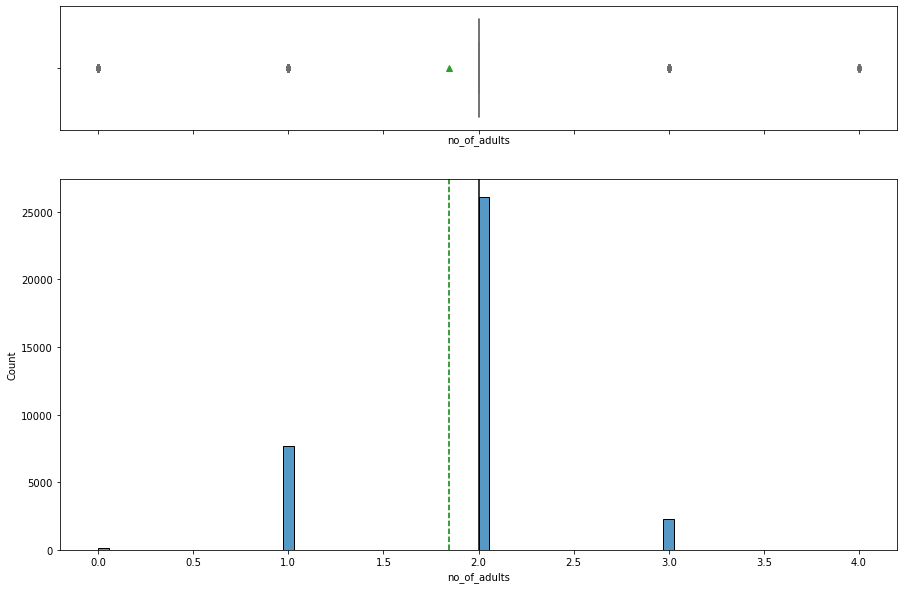

<IPython.core.display.Javascript object>

In [41]:
histogram_boxplot(df1, "no_of_adults", bins=70)

In [42]:
# Insights;
# majority of the data is found at the centre ( at 2.0), i.e most of the booking seems to be made for two adults.
# It is slightly left skewed.

<IPython.core.display.Javascript object>

In [43]:
# Observations on no_of_children

<IPython.core.display.Javascript object>

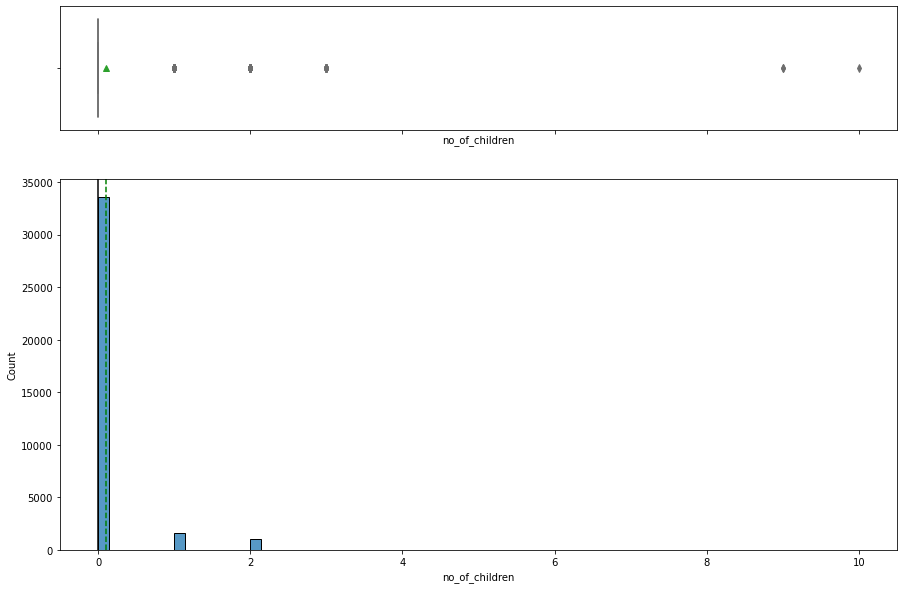

<IPython.core.display.Javascript object>

In [44]:
histogram_boxplot(df1, "no_of_children", bins=70)

In [45]:
# Insights
# As shown on the distribution, it is quite understandable that very few children seems to visit the hotel,
# therefore the distribution is concentrated at 0.
# . The distibution is right skewed

<IPython.core.display.Javascript object>

In [46]:
# Observations on no_of_weekend_nights

<IPython.core.display.Javascript object>

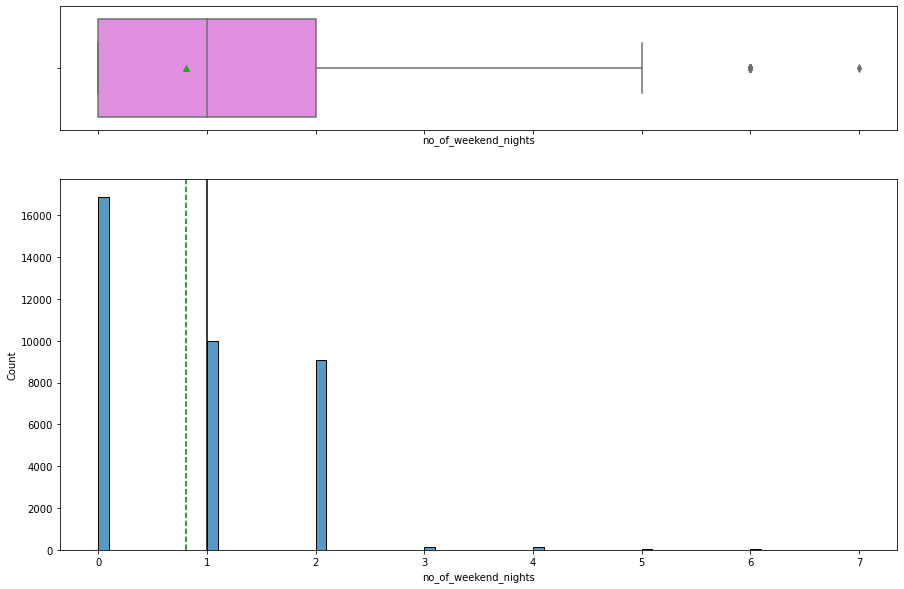

<IPython.core.display.Javascript object>

In [47]:
histogram_boxplot(df1, "no_of_weekend_nights", bins=70)

In [48]:
# Insights:
# . The distribution is right skewed with possible outliers on the right side

<IPython.core.display.Javascript object>

In [49]:
# Observations on no_of_week_nights

<IPython.core.display.Javascript object>

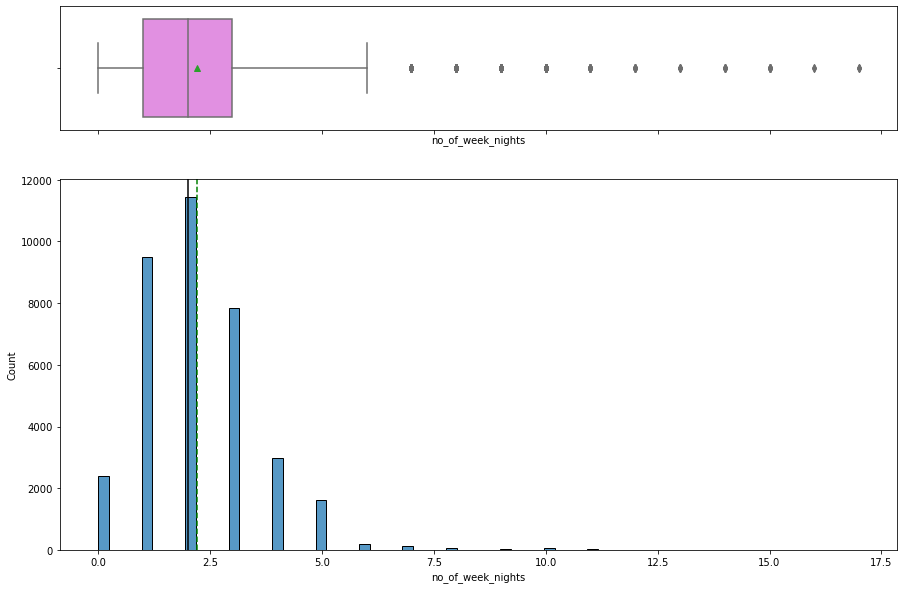

<IPython.core.display.Javascript object>

In [50]:
histogram_boxplot(df1, "no_of_week_nights", bins=70)

In [51]:
# Insights
# no_of_week_nights is right-skewed. It has lots of outliers on the right side which we can cap. Most customers
# tend to spend ~3 days at the hotel during week_nights

<IPython.core.display.Javascript object>

In [52]:
# Observations on required_car_parking_space

<IPython.core.display.Javascript object>

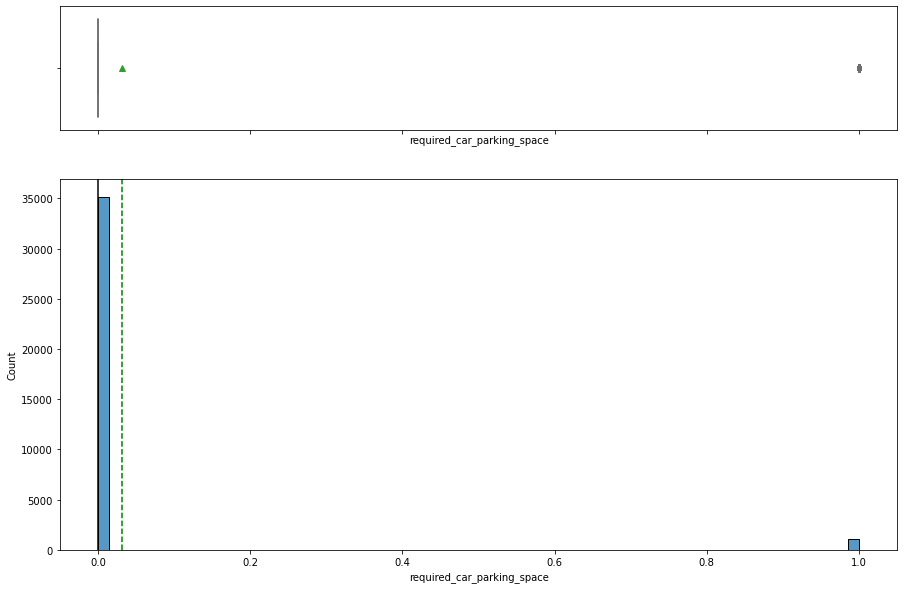

<IPython.core.display.Javascript object>

In [53]:
histogram_boxplot(df1, "required_car_parking_space", bins=70)

In [54]:
# Insights
# .The required_car_parking_space distirbution is concentrated at 0 and some data at 1, meaning most of the
# customers do not own a car or do not visit the hotel with their car. More informations could be obtained
# from the data if it is changed to a categorical variable.

<IPython.core.display.Javascript object>

In [55]:
# Observations on lead_time

<IPython.core.display.Javascript object>

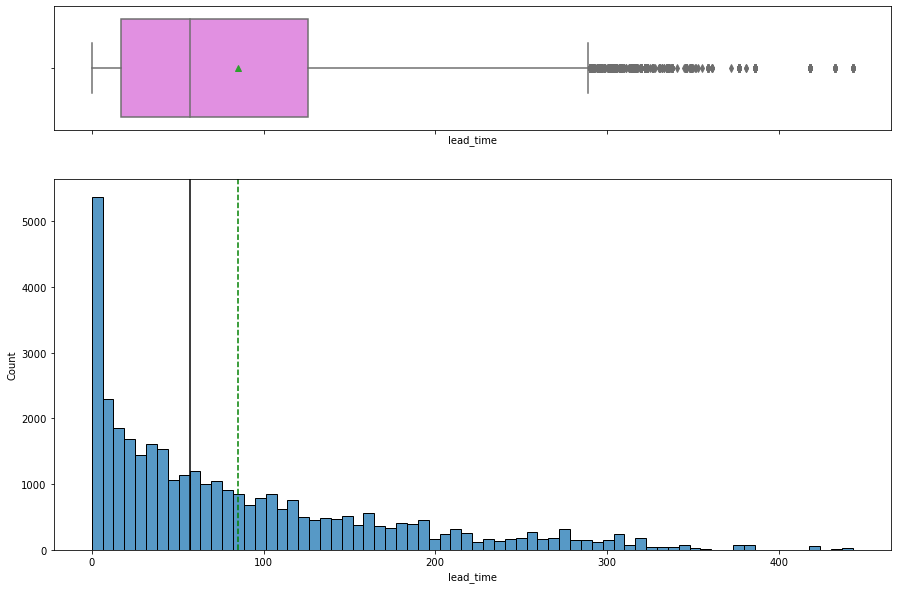

<IPython.core.display.Javascript object>

In [56]:
histogram_boxplot(df1, "lead_time", bins=70)

In [57]:
# Insights:
# .The lead_time distribution is right skewed with lots of outliers at the right side. The average lead_time is
# ~85 days

<IPython.core.display.Javascript object>

In [58]:
#  Observations for arrival_year

<IPython.core.display.Javascript object>

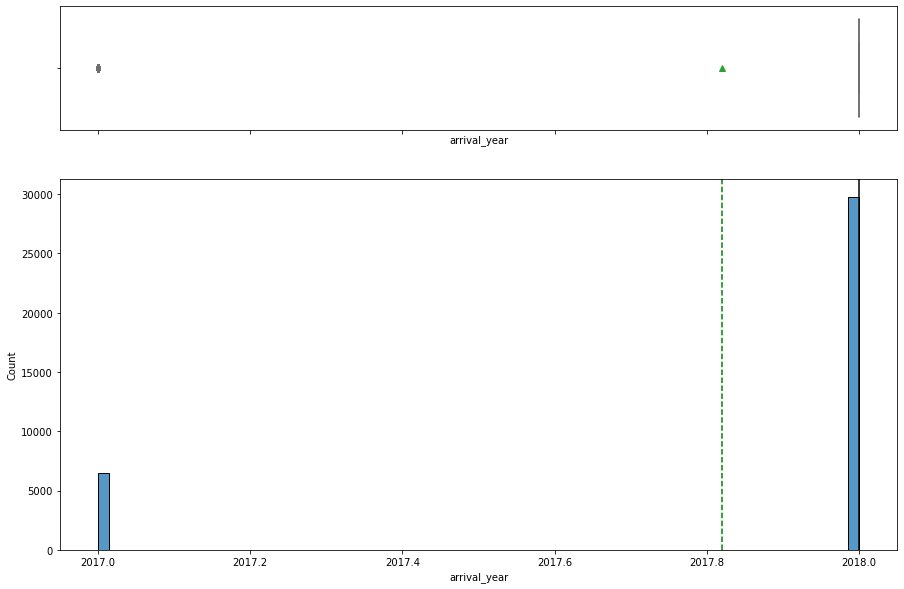

<IPython.core.display.Javascript object>

In [59]:
histogram_boxplot(df1, "arrival_year", bins=70)

In [60]:
# Insights
# The distribution on the arrival_year is concentrated on 2018  than 2017, meaning most of the bookings
# observations were made 2018.

<IPython.core.display.Javascript object>

In [61]:
# Observations for arrival_month

<IPython.core.display.Javascript object>

In [62]:
# What are the busiest months in the hotel?

<IPython.core.display.Javascript object>

In [63]:
df1["arrival_month"].value_counts(normalize=True)

10    0.146575
9     0.127112
8     0.105114
6     0.088298
12    0.083280
11    0.082150
7     0.080496
4     0.075424
5     0.071620
3     0.065003
2     0.046975
1     0.027953
Name: arrival_month, dtype: float64

<IPython.core.display.Javascript object>

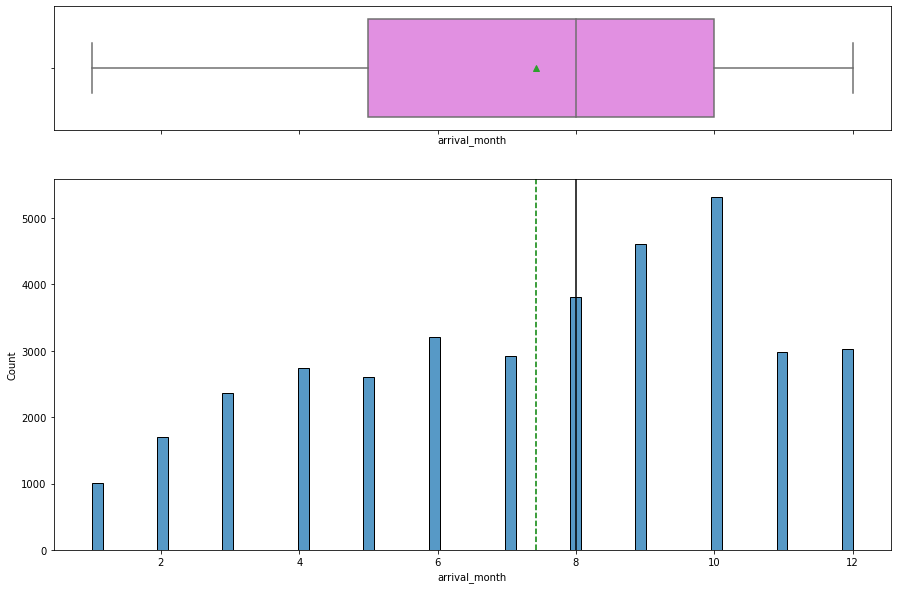

<IPython.core.display.Javascript object>

In [64]:
histogram_boxplot(df1, "arrival_month", bins=70)

In [65]:
# Insights
# .The busiest months in the hotel are October followed by September and August. The distiribution is left skewed.

<IPython.core.display.Javascript object>

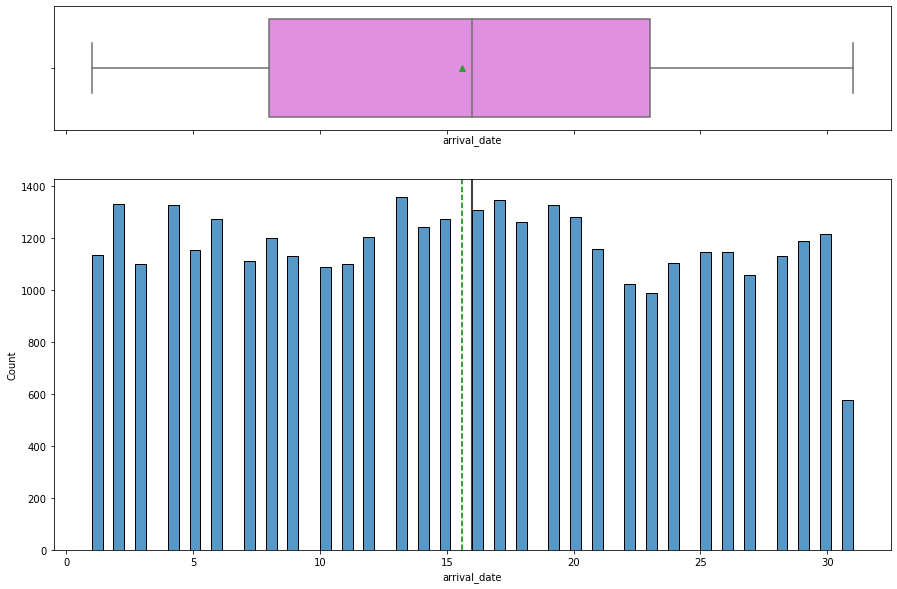

<IPython.core.display.Javascript object>

In [66]:
histogram_boxplot(df1, "arrival_date", bins=70)

In [67]:
# Insights
# .The arrival_date is almost uniformly distributed. It ranges from day 1 to 31. It is understandable that the
# disribution of the data on day 31 is slightly low as not all of the months of the year have 31 days.

<IPython.core.display.Javascript object>

In [68]:
# Observations for repeated_guest

<IPython.core.display.Javascript object>

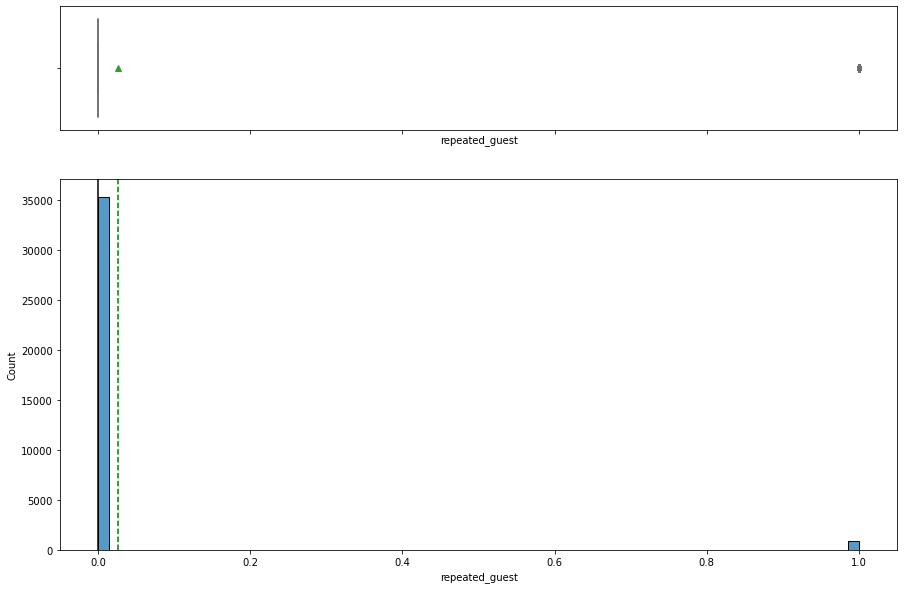

<IPython.core.display.Javascript object>

In [69]:
histogram_boxplot(df1, "repeated_guest", bins=70)

In [70]:
# Insights
# .The distribution of repeated_guest is concentrated mainly at 0 and very small amount at 1, meaning very few of
# the bookings are done by repeated guest.
# .The distribution of repeated_guest also suggests we should look at it as a category to extract more information.

<IPython.core.display.Javascript object>

In [71]:
# Observations for no_of_previous_cancellations

<IPython.core.display.Javascript object>

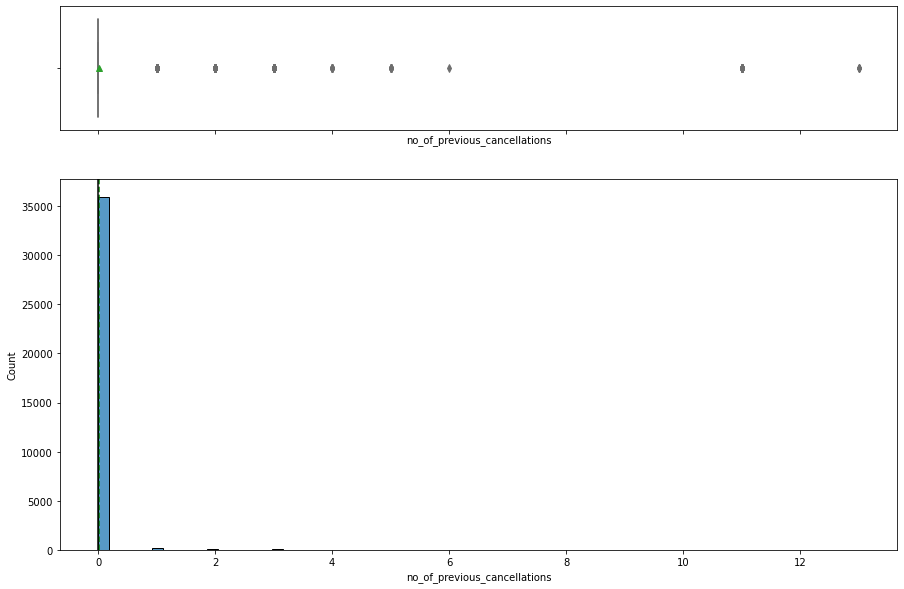

<IPython.core.display.Javascript object>

In [72]:
histogram_boxplot(df1, "no_of_previous_cancellations", bins=70)

In [73]:
# Insights:
# .The distribution of no_of_previous_cancellations is right skewed with some possible outliers in the variable.
# .The distribution is concentrated around 0 meaning most of the previous bookings were not canceled.
# .The distribution of no_of_previous_cancellations also suggests we should look at it as a category to extract
# more information.

<IPython.core.display.Javascript object>

In [74]:
# Observations for no_of_previous_bookings_not_canceled

<IPython.core.display.Javascript object>

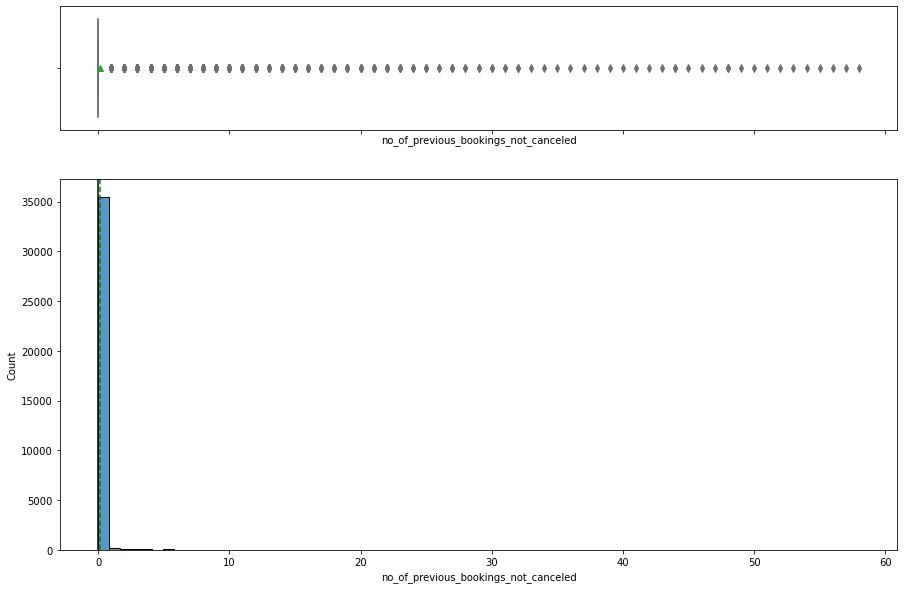

<IPython.core.display.Javascript object>

In [75]:
histogram_boxplot(df1, "no_of_previous_bookings_not_canceled", bins=70)

In [76]:
# Insights:
# .The distribution on no_of_previous_bookings_not_canseled is right skewed.
# .There are outliers in the variable.
# .The distribution is concentrated around 0 meaning most of the previous bookings were not canceled.

<IPython.core.display.Javascript object>

In [77]:
# Observations for avg_price_per_room

<IPython.core.display.Javascript object>

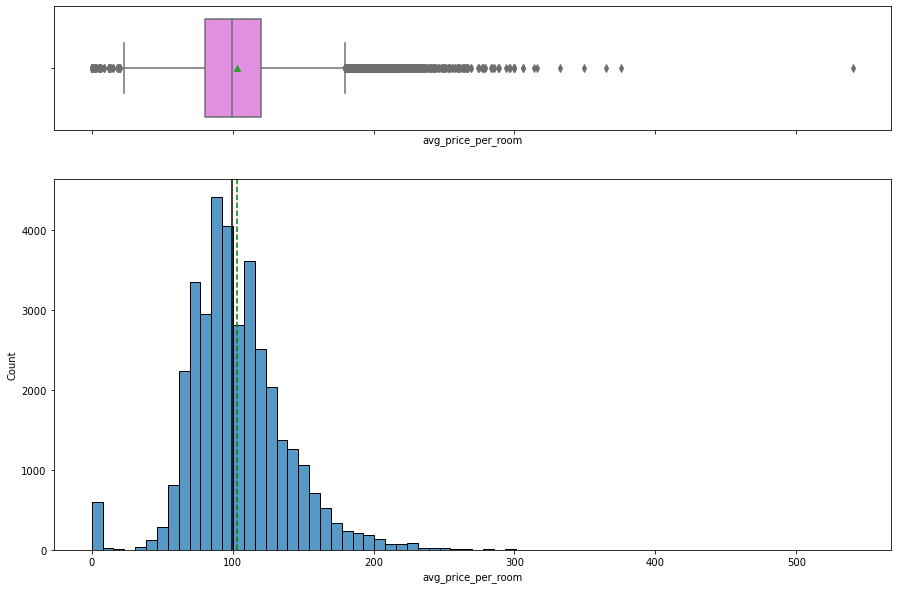

<IPython.core.display.Javascript object>

In [78]:
histogram_boxplot(df1, "avg_price_per_room", bins=70)

In [79]:
# Insights
# .The distribution on the avg_price_per_room is almost normally distributed as most of the data is concentrated at
# centre (mean and median) of the distribution with a mean price of ~103 euros.

<IPython.core.display.Javascript object>

In [80]:
# Observations for no_of_special_requests

<IPython.core.display.Javascript object>

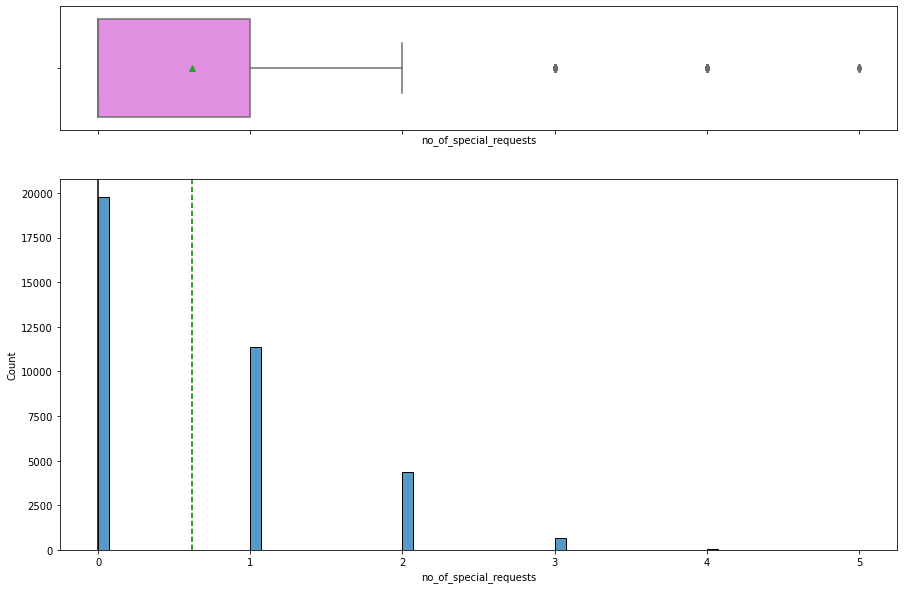

<IPython.core.display.Javascript object>

In [81]:
histogram_boxplot(df1, "no_of_special_requests", bins=70)

In [82]:
# Insights
# .The distribution of no_special_requests is right skewed with some outliers.
# .The distribution of no_special_requests suggests we should look at it as a category to extract
# more information.

<IPython.core.display.Javascript object>

In [83]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

In [84]:
# Observations on type_of_meal_plan

<IPython.core.display.Javascript object>

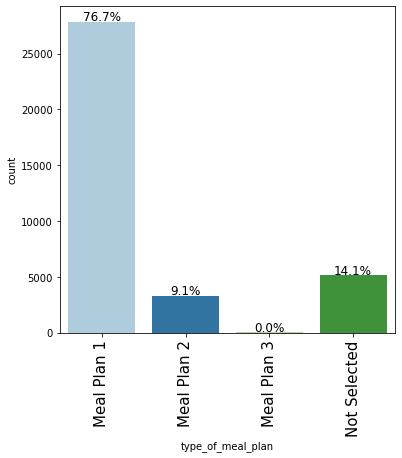

<IPython.core.display.Javascript object>

In [85]:
labeled_barplot(df1, "type_of_meal_plan", perc=True)

In [86]:
# Insights:
# .76.7% of the type_of_meal_plan ordered belong to Meal Plan 1 followed by 9.1% for Meal Plan 2 while 14.1% did
# not select any type_of_meal_plan

<IPython.core.display.Javascript object>

In [87]:
# Observations on room_type_reserved

<IPython.core.display.Javascript object>

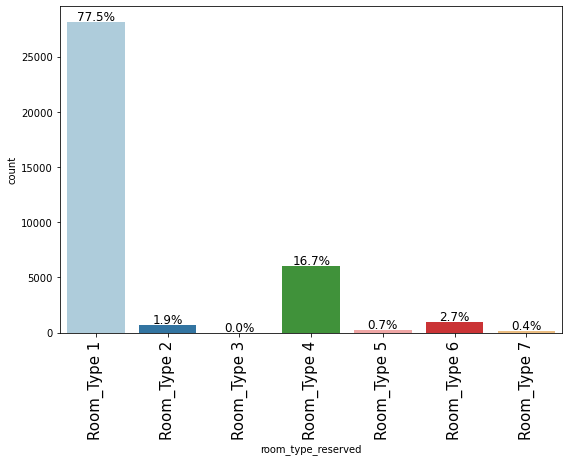

<IPython.core.display.Javascript object>

In [88]:
labeled_barplot(df1, "room_type_reserved", perc=True)

In [89]:
# Insights:
# .77.5% of the hotel room_type_reserved  were Room_Type 1, followed by 16.7% for Room_Type 4.

<IPython.core.display.Javascript object>

In [90]:
# Observations on market_segment_type

<IPython.core.display.Javascript object>

In [91]:
# 2. Which market segment do most of the guests come from?

<IPython.core.display.Javascript object>

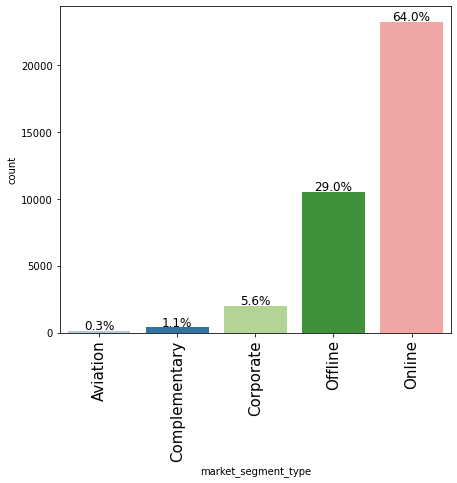

<IPython.core.display.Javascript object>

In [92]:
labeled_barplot(df1, "market_segment_type", perc=True)

In [93]:
# Insights:
# .64% of the market_segment_type is online followed by 29% for Offline and 5.6% for Corporate.

<IPython.core.display.Javascript object>

In [94]:
# Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in
# room prices in different market segments?

<IPython.core.display.Javascript object>

In [95]:
df1.groupby("market_segment_type")["avg_price_per_room"].value_counts()

market_segment_type  avg_price_per_room
Aviation             95.00                 55
                     110.00                52
                     94.00                  6
                     79.00                  4
                     88.00                  3
                                           ..
Online               314.10                 1
                     316.00                 1
                     332.57                 1
                     349.63                 1
                     375.50                 1
Name: avg_price_per_room, Length: 4543, dtype: int64

<IPython.core.display.Javascript object>

In [96]:
# In percentage
df1.groupby("market_segment_type")["avg_price_per_room"].value_counts(normalize=True)

market_segment_type  avg_price_per_room
Aviation             95.00                 0.440000
                     110.00                0.416000
                     94.00                 0.048000
                     79.00                 0.032000
                     88.00                 0.024000
                                             ...   
Online               314.10                0.000043
                     316.00                0.000043
                     332.57                0.000043
                     349.63                0.000043
                     375.50                0.000043
Name: avg_price_per_room, Length: 4543, dtype: float64

<IPython.core.display.Javascript object>

In [97]:
# Insights:
# .Most customers of the Aviation market_segment_type tend to make booking reservations for hotel rooms with
# avg_price_per_room of 95 euros, 110 euros and 94 euros with their respective percentages being 0.44%, 0.416% and
# 0.048%. This is followed by the Online market_segment_type with varying average per room  including 314.1 euros,
# 316 euros etc but with the same percentage of 0.000043%.

<IPython.core.display.Javascript object>

In [98]:
# Observations on booking_status

<IPython.core.display.Javascript object>

In [99]:
# 4.What percentage of bookings are canceled?

<IPython.core.display.Javascript object>

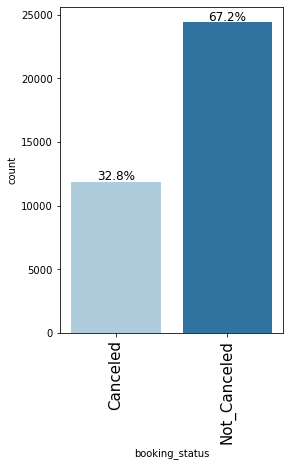

<IPython.core.display.Javascript object>

In [100]:
labeled_barplot(df1, "booking_status", perc=True)

In [101]:
# Insights:
# .32.8% of the bookings are canceled

<IPython.core.display.Javascript object>

In [102]:
# Bivariate Analysis

<IPython.core.display.Javascript object>

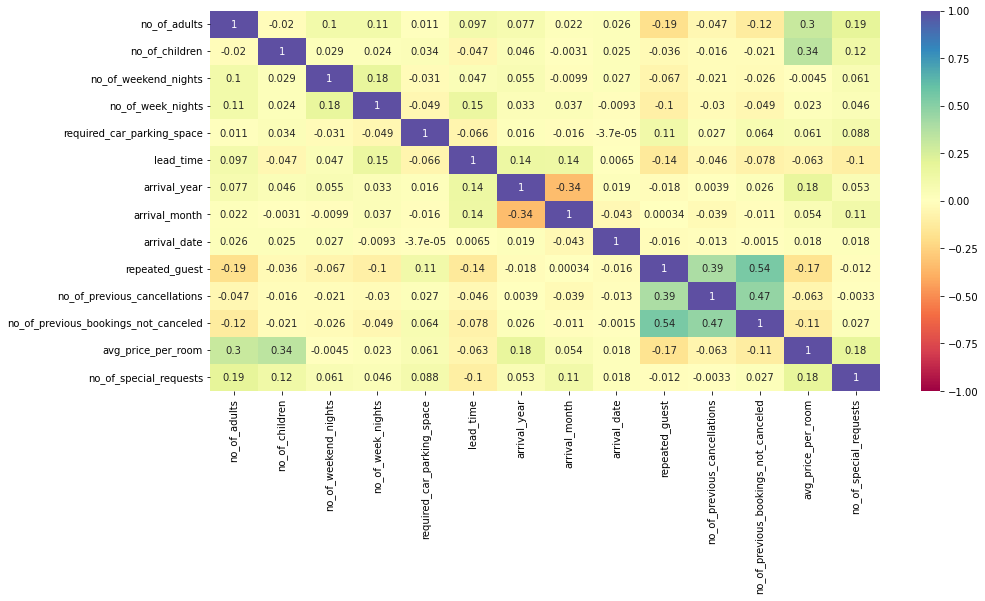

<IPython.core.display.Javascript object>

In [103]:
plt.figure(figsize=(15, 7))
sns.heatmap(df1.corr(), annot=True, vmin=-1, vmax=1, cmap="Spectral")
plt.show()

In [104]:
# Insights
# . repeated_guest shows moderately correlation with no_of_previous_bookings_not_canceled (0.54).
# .Likewise, repeated_guest is weakly correlated with no_of_previous_cancellations.
# .no_of_previous_bookings_not_canceled is weakly correlated with no_of_previous_cancellations (0.47)
# .no_of_adult and no_of_children  are weakly correlated with avg_price_per_room with correlation values of 0.3 and
# 0.34 respectively.

<IPython.core.display.Javascript object>

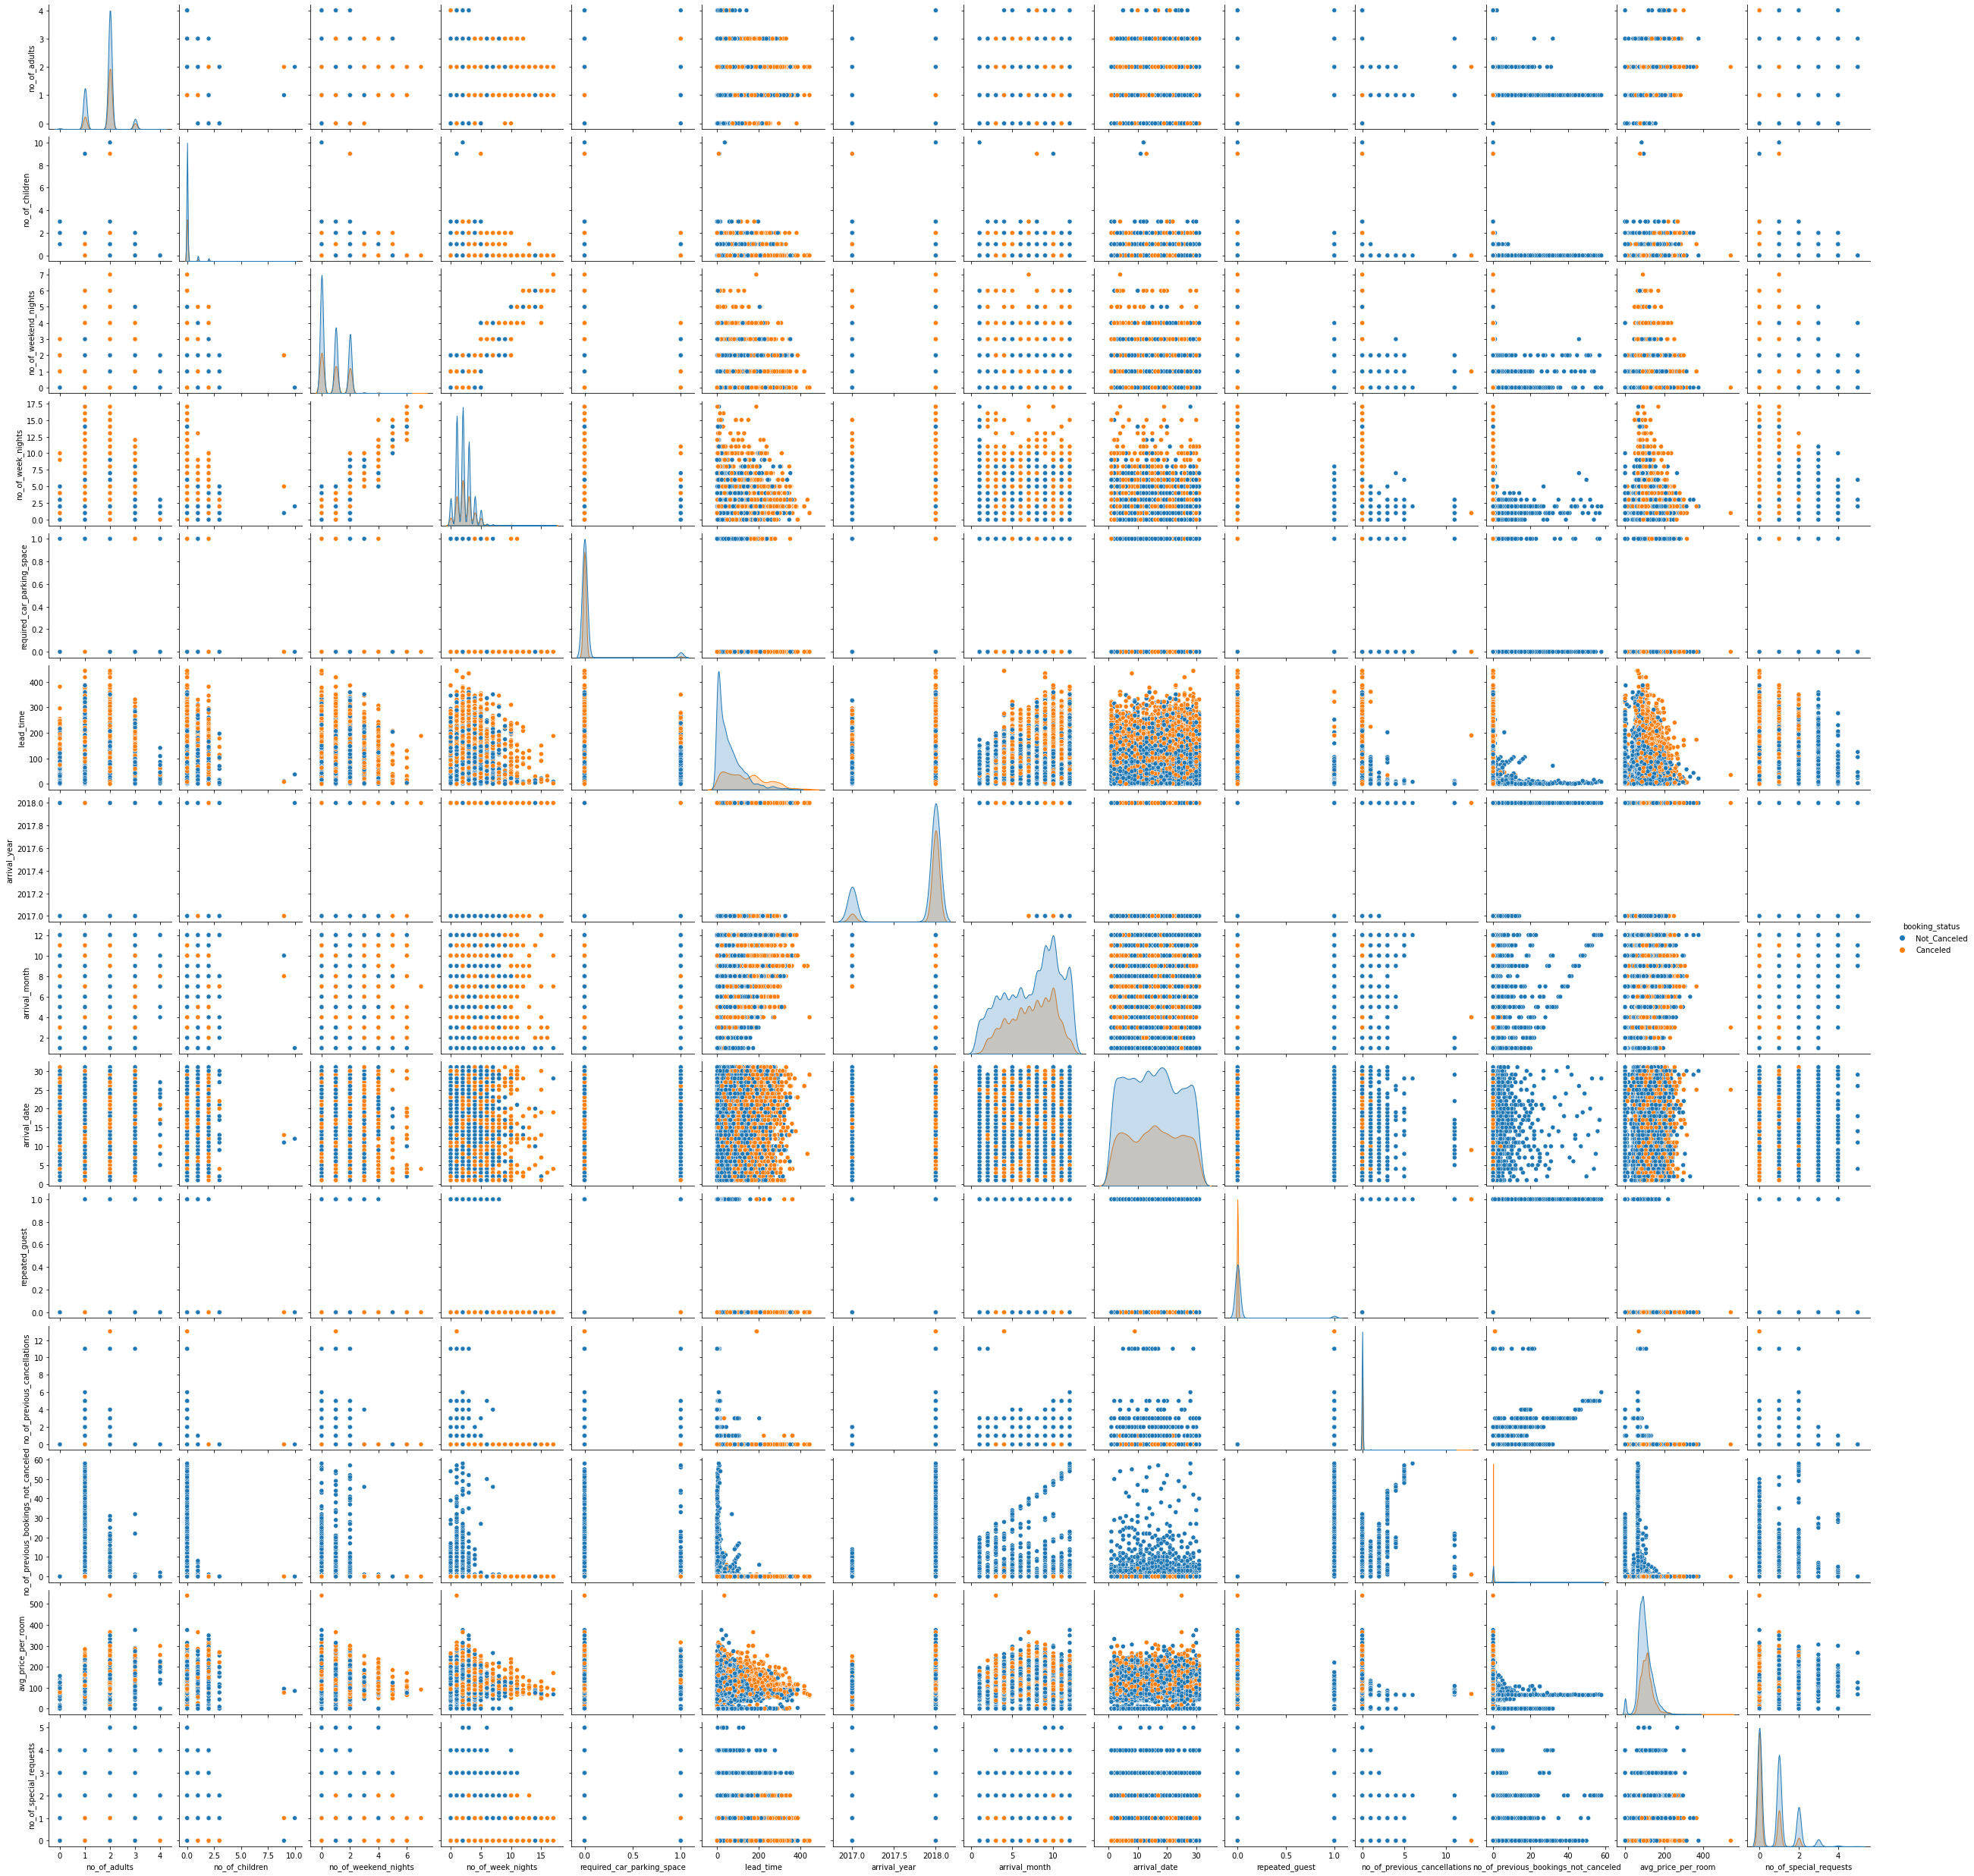

<IPython.core.display.Javascript object>

In [105]:
sns.pairplot(data=df1, hue="booking_status")
plt.show()

In [106]:
# Insights
# We can see varying distributions in the variables for booking_status, we should investigate it further.

<IPython.core.display.Javascript object>

In [107]:
# booking_status vs no_of_adults, no_of_weekend_nights, no_of_week_nights, arrival_month, repeated_guest,
# no_of_previous_cancellations, no_of_previous_bookings_not_canceled, avg_price_per_room and no_of_special_requests

<IPython.core.display.Javascript object>

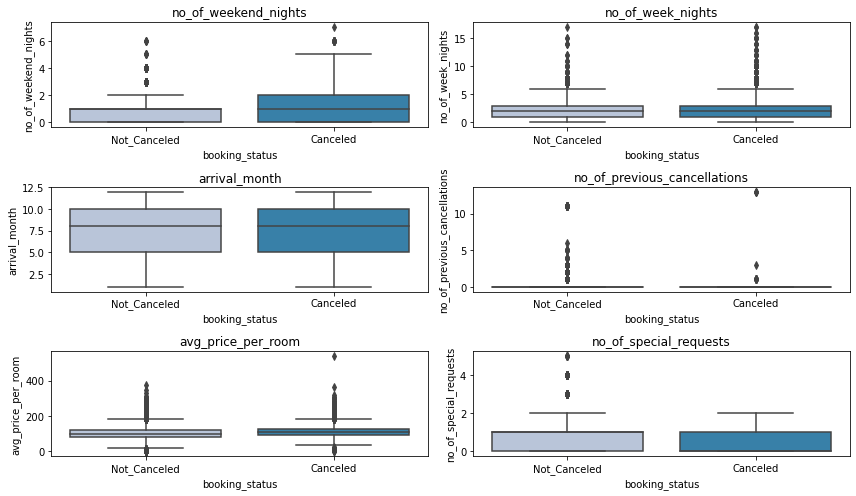

<IPython.core.display.Javascript object>

In [108]:
cols = df1[
    [
        "no_of_weekend_nights",
        "no_of_week_nights",
        "arrival_month",
        "no_of_previous_cancellations",
        "avg_price_per_room",
        "no_of_special_requests",
    ]
].columns.tolist()
plt.figure(figsize=(12, 7))

for i, variable in enumerate(cols):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(df1["booking_status"], df1[variable], palette="PuBu")
    plt.tight_layout()
    plt.title(variable)
plt.show()

In [109]:
# Observations:
# It is difficult to make an interpretation from the graphs above let's visualize them by removing these outliers
# (for visualization not from orignal data) to get a better understanding

<IPython.core.display.Javascript object>

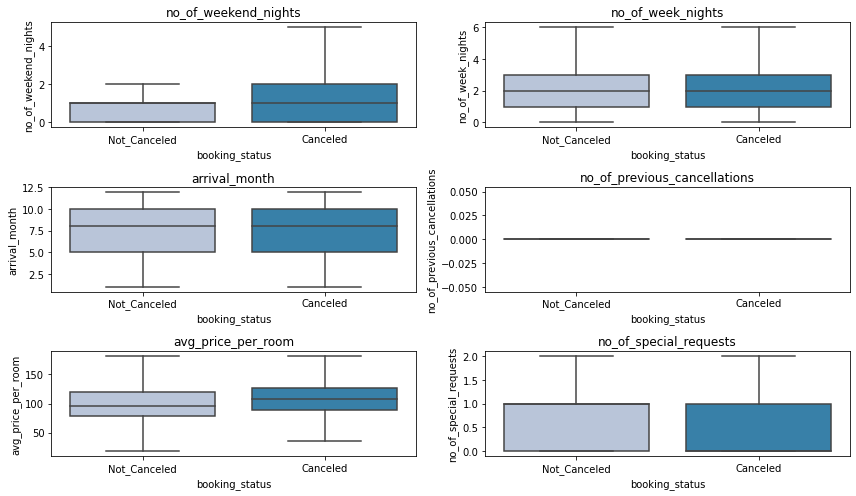

<IPython.core.display.Javascript object>

In [110]:
cols = df1[
    [
        "no_of_weekend_nights",
        "no_of_week_nights",
        "arrival_month",
        "no_of_previous_cancellations",
        "avg_price_per_room",
        "no_of_special_requests",
    ]
].columns.tolist()
plt.figure(figsize=(12, 7))

for i, variable in enumerate(cols):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(df1["booking_status"], df1[variable], palette="PuBu", showfliers=False)
    plt.tight_layout()
    plt.title(variable)
plt.show()

In [111]:
# Insights
# .There is a clear distinction for the booking status for customers who made hotel reservations for
# no_of_weekend_nights as the number of cancellations are higher than Not_Canceled. It should be noted that there
# are some outliers in the Not_canceled variable.
# .no_of_week_nights, arrival_month, no_of_previous_cancellations and no_of_special_requests show no distinction
# in their plot with respect to the booking status except that there are outliers for the Not_Canceled
# variable for the no_of_special_requests.
# .There is a slight difference in the booking_status for the avg_price_per_room as the median of the canceled
# variable is slight higher average price per room seems to slightly influence cancellations.

<IPython.core.display.Javascript object>

In [112]:
# Observations for booking_status vs no_of_adults, no_of_previous_bookings_not_canceled

<IPython.core.display.Javascript object>

In [113]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

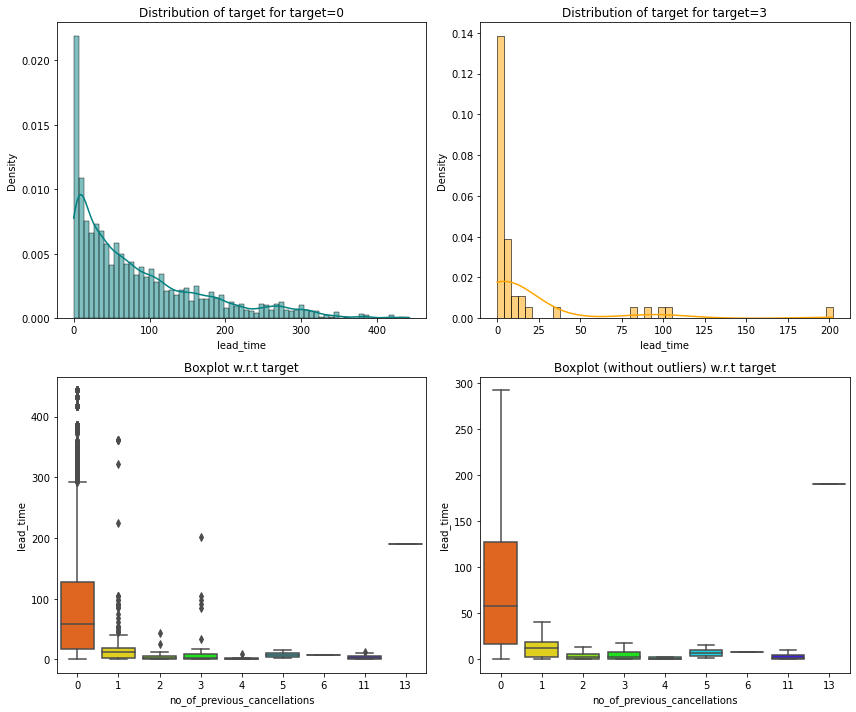

<IPython.core.display.Javascript object>

In [114]:
distribution_plot_wrt_target(df1, "lead_time", "no_of_previous_cancellations")

In [115]:
# Insights
# .Majority of the previous bookings were not canceled and had a lead_time that is less than 300 days. But, there
# are some outliers on the right side of the boxplot.
# .Most of the no_of_previous_cancellations were done once and has a lead_time < 50 days with some outliers on the
# right side of the boxplot.

<IPython.core.display.Javascript object>

In [116]:
# Observations for booking_status vs type_of_meal_plan

<IPython.core.display.Javascript object>

In [117]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

In [118]:
# type_of_meal_plan vs booking_status

<IPython.core.display.Javascript object>

booking_status     Canceled  Not_Canceled    All
type_of_meal_plan                               
All                   11885         24390  36275
Meal Plan 1            8679         19156  27835
Not Selected           1699          3431   5130
Meal Plan 2            1506          1799   3305
Meal Plan 3               1             4      5
------------------------------------------------------------------------------------------------------------------------


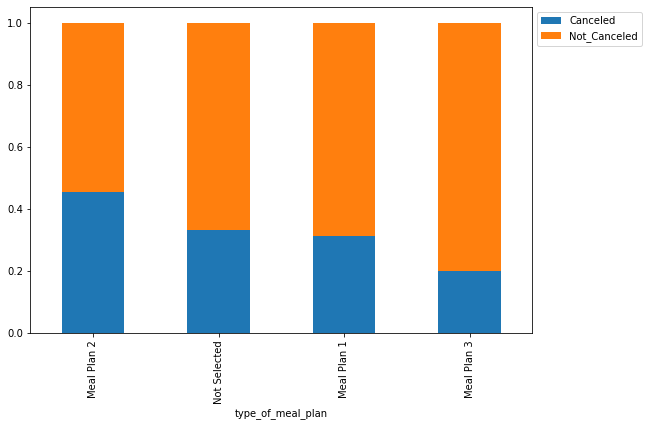

<IPython.core.display.Javascript object>

In [119]:
stacked_barplot(df1, "type_of_meal_plan", "booking_status")

In [120]:
# Insights
# .Most of the cancellations were done by customers who had ordered Meal Plan 2, followed by those who had not
# selected any type_of_meal_plan and Meal Plan 1.

<IPython.core.display.Javascript object>

In [121]:
# room_type_reserved vs booking_status

<IPython.core.display.Javascript object>

booking_status      Canceled  Not_Canceled    All
room_type_reserved                               
All                    11885         24390  36275
Room_Type 1             9072         19058  28130
Room_Type 4             2069          3988   6057
Room_Type 6              406           560    966
Room_Type 2              228           464    692
Room_Type 5               72           193    265
Room_Type 7               36           122    158
Room_Type 3                2             5      7
------------------------------------------------------------------------------------------------------------------------


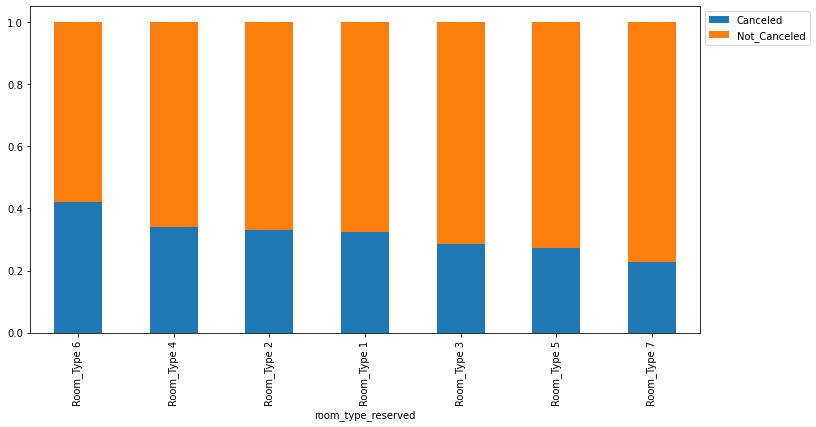

<IPython.core.display.Javascript object>

In [122]:
stacked_barplot(df1, "room_type_reserved", "booking_status")

In [123]:
# Insights
# .Most booking cancellations cancellations were shown by customers who had reserved Room_Type 6 while the
# least number of cancellations were observed amongst those who had reserved Room_Type 7.

<IPython.core.display.Javascript object>

In [124]:
# market_segment_type vs booking_status

<IPython.core.display.Javascript object>

booking_status       Canceled  Not_Canceled    All
market_segment_type                               
All                     11885         24390  36275
Online                   8475         14739  23214
Offline                  3153          7375  10528
Corporate                 220          1797   2017
Aviation                   37            88    125
Complementary               0           391    391
------------------------------------------------------------------------------------------------------------------------


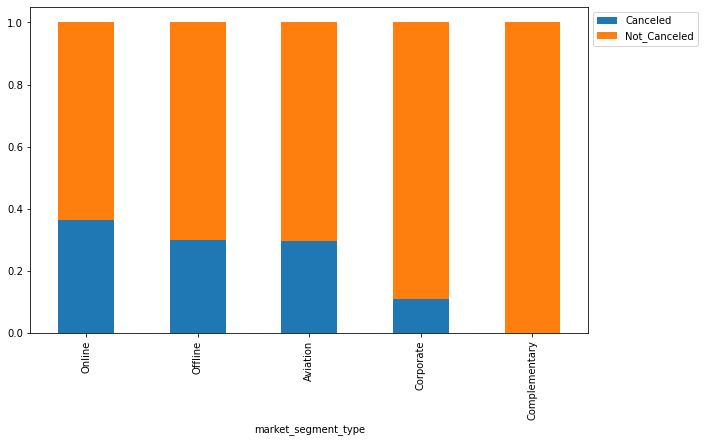

<IPython.core.display.Javascript object>

In [125]:
stacked_barplot(df1, "market_segment_type", "booking_status")

In [126]:
# Insights
# The highest number of cancellations were observed amongst the Online market_segment_type while no cancellations
# were observed amongst the Complementary market_segment_type variable

<IPython.core.display.Javascript object>

In [127]:
# no_of_children vs booking_status

<IPython.core.display.Javascript object>

booking_status  Canceled  Not_Canceled    All
no_of_children                               
All                11885         24390  36275
0                  10882         22695  33577
1                    540          1078   1618
2                    457           601   1058
3                      5            14     19
9                      1             1      2
10                     0             1      1
------------------------------------------------------------------------------------------------------------------------


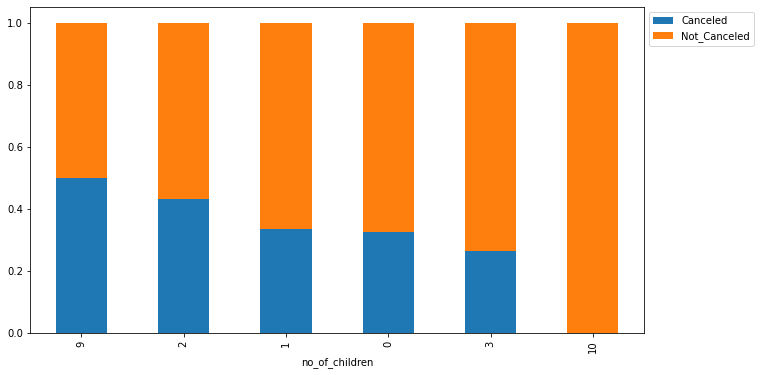

<IPython.core.display.Javascript object>

In [128]:
stacked_barplot(df1, "no_of_children", "booking_status")

In [129]:
# Insights:
# .The highest cancellations were observed amongst the no_of_children of 2 and 1.

<IPython.core.display.Javascript object>

In [130]:
# arrival_year vs booking_status

<IPython.core.display.Javascript object>

booking_status  Canceled  Not_Canceled    All
arrival_year                                 
All                11885         24390  36275
2018               10924         18837  29761
2017                 961          5553   6514
------------------------------------------------------------------------------------------------------------------------


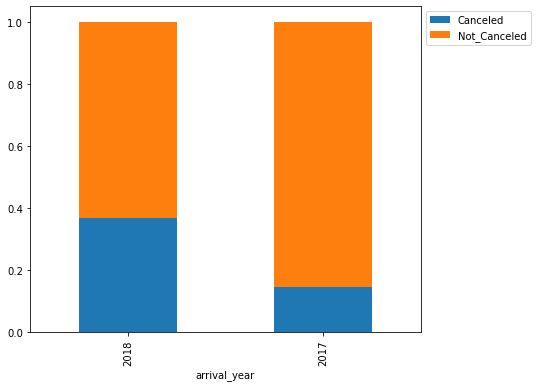

<IPython.core.display.Javascript object>

In [131]:
stacked_barplot(df1, "arrival_year", "booking_status")

In [132]:
# Insight:
# .Most of the booking cancellations were observed in 2018 than 2017

<IPython.core.display.Javascript object>

In [133]:
# repeated_guest vs booking_status

<IPython.core.display.Javascript object>

booking_status  Canceled  Not_Canceled    All
repeated_guest                               
All                11885         24390  36275
0                  11869         23476  35345
1                     16           914    930
------------------------------------------------------------------------------------------------------------------------


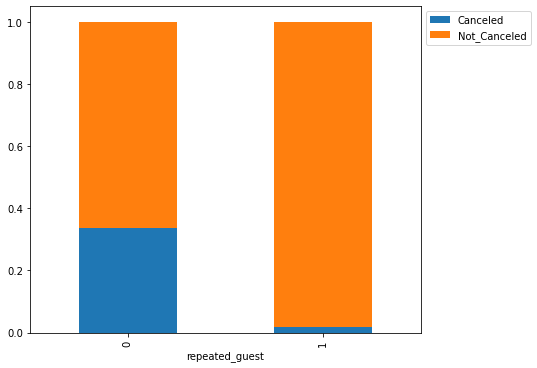

<IPython.core.display.Javascript object>

In [134]:
stacked_barplot(df1, "repeated_guest", "booking_status")

In [135]:
# Insights:
# .Most of the cancellations were observed amongs first time customers/guests as compare to repeated_guest or
# returning customeers.

<IPython.core.display.Javascript object>

In [136]:
# 5.Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage
# of repeating guests cancel?

<IPython.core.display.Javascript object>

In [137]:
df1.groupby("booking_status")["repeated_guest"].value_counts(normalize=True)

booking_status  repeated_guest
Canceled        0                 0.998654
                1                 0.001346
Not_Canceled    0                 0.962526
                1                 0.037474
Name: repeated_guest, dtype: float64

<IPython.core.display.Javascript object>

In [138]:
# Insights:
# .0.00135% 0f the repeated_guest canceled their bookings.

<IPython.core.display.Javascript object>

In [139]:
# required_car_parking_space vs booking_status

<IPython.core.display.Javascript object>

booking_status              Canceled  Not_Canceled    All
required_car_parking_space                               
All                            11885         24390  36275
0                              11771         23380  35151
1                                114          1010   1124
------------------------------------------------------------------------------------------------------------------------


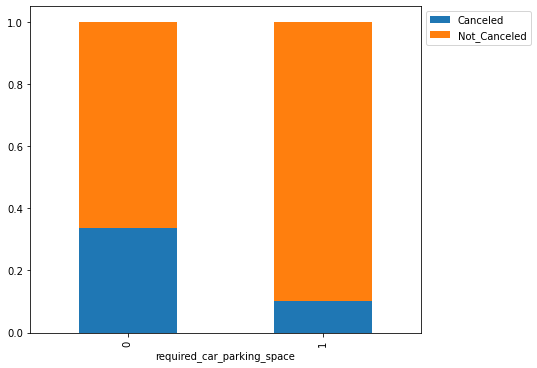

<IPython.core.display.Javascript object>

In [140]:
stacked_barplot(df1, "required_car_parking_space", "booking_status")

In [141]:
# Insights:
# .Majority of the cancellations are seen amongst customers that do no require car parking space as compared to
# those that require_car_parking_space.

<IPython.core.display.Javascript object>

In [142]:
# 6.Many guests have special requirements when booking a hotel room. Do these requirements affect booking
# cancellation?

<IPython.core.display.Javascript object>

In [143]:
df1.groupby("booking_status")["no_of_special_requests"].value_counts()

booking_status  no_of_special_requests
Canceled        0                          8545
                1                          2703
                2                           637
Not_Canceled    0                         11232
                1                          8670
                2                          3727
                3                           675
                4                            78
                5                             8
Name: no_of_special_requests, dtype: int64

<IPython.core.display.Javascript object>

In [144]:
df1.groupby("booking_status")["no_of_special_requests"].value_counts(normalize=True)

booking_status  no_of_special_requests
Canceled        0                         0.718973
                1                         0.227430
                2                         0.053597
Not_Canceled    0                         0.460517
                1                         0.355474
                2                         0.152809
                3                         0.027675
                4                         0.003198
                5                         0.000328
Name: no_of_special_requests, dtype: float64

<IPython.core.display.Javascript object>

no_of_special_requests      0      1     2    3   4  5    All
booking_status                                               
Not_Canceled            11232   8670  3727  675  78  8  24390
All                     19777  11373  4364  675  78  8  36275
Canceled                 8545   2703   637    0   0  0  11885
------------------------------------------------------------------------------------------------------------------------


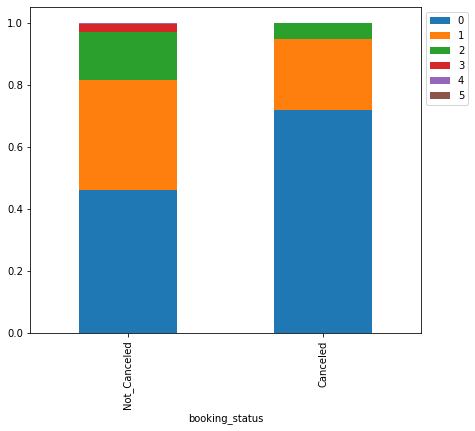

<IPython.core.display.Javascript object>

In [145]:
stacked_barplot(df1, "booking_status", "no_of_special_requests")

In [146]:
# Insights:
# .The number of booking cancellations tends to decrease with increase in the no_of_special_requests.
# .Most cancellations with regards to those with special requests were done by customers with
# no_of_special_requests of one and two with their percentages of 0.227% and 0.054% respectively.

<IPython.core.display.Javascript object>

In [147]:
# booking_status vs no_of_weekend_nights, no_of_week_nights, arrival_month, no_of_previous_cancellations,
# avg_price_per_room, no_of_special_requests

<IPython.core.display.Javascript object>

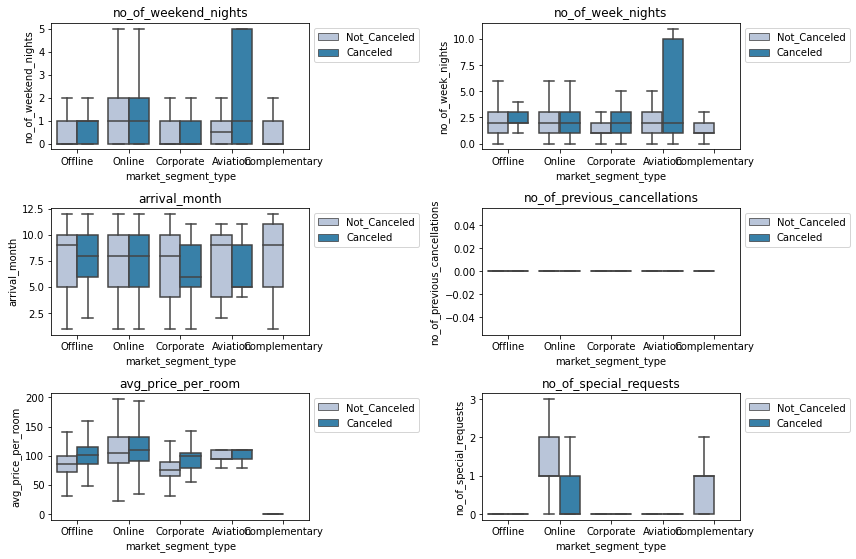

<IPython.core.display.Javascript object>

In [148]:
cols = df1[
    [
        "no_of_weekend_nights",
        "no_of_week_nights",
        "arrival_month",
        "no_of_previous_cancellations",
        "avg_price_per_room",
        "no_of_special_requests",
    ]
].columns.tolist()
plt.figure(figsize=(12, 10))

for i, variable in enumerate(cols):
    plt.subplot(4, 2, i + 1)
    sns.boxplot(
        df1["market_segment_type"],
        data[variable],
        hue=df1["booking_status"],
        palette="PuBu",
        showfliers=False,  # turning-off outliers
    )
    plt.tight_layout()
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.title(variable)
plt.show()

In [149]:
# .Most of the cancellations were don by the Aviation market_segment_type with regards to both the
# no_of_weekend_nights and no_of_week_nights.
# .Less number of cancellations were observed amongst the market_segment_type with respect to no_of_special_request.
# .There was no cancellations observed for the Complementary market_segment_type as per the arrival_month and the
# no_of_special_requests.
# as it is solely dominated by the Not_Canceled variable.
# .The number of cancellations is slightly higher in the Offline and Corporate market_segment_type variables as per
# the avg-price_per_room

<IPython.core.display.Javascript object>

In [150]:
bookingstatus_data = df1[df1["booking_status"] == "Not_Canceled"]
bookingstatus_data.groupby(["arrival_month", "market_segment_type"])[
    "booking_status"
].count()

arrival_month  market_segment_type
1              Complementary            30
               Corporate               100
               Offline                 314
               Online                  546
2              Aviation                  1
               Complementary            18
               Corporate               193
               Offline                 338
               Online                  724
3              Aviation                  3
               Complementary            23
               Corporate               156
               Offline                 427
               Online                 1049
4              Aviation                 21
               Complementary            12
               Corporate                59
               Offline                 396
               Online                 1253
5              Aviation                 10
               Complementary            23
               Corporate               153
               Offl

<IPython.core.display.Javascript object>

In [151]:
# Insights:
# .The number of customers as per the (market_segment_type) who did not cancel their booking reservations arrived at
# the hotel gradually increases from January till October, with October being the month with the highest arrival month
# for the  customers. The number drops slightly in November and increases in December.
# .Majority of the customers here are of the Online market_segment_type, followed by the Offline market_segment_type.

<IPython.core.display.Javascript object>

In [152]:
# EDA Summary

<IPython.core.display.Javascript object>

In [153]:
# Data Description:

<IPython.core.display.Javascript object>

In [154]:
# .Dependent variable is the booking_status which is of categorical data type.
# .There are total 19 columns and 36275 observations in the dataset
# .Most of the data-types are continuous integer (int64), one column (avg_price_per_room) is of float64 data-type],
# while Booking_ID, type_of_meal_plan, room_type_reserved, and booking_status are categorical data types.

<IPython.core.display.Javascript object>

In [155]:
# Data Cleaning:

<IPython.core.display.Javascript object>

In [156]:
# .The data did not require any form of data cleaning. This is also supported by the fact that we are going to
# build a decision tree model which requires less amount of data preprocessing.

<IPython.core.display.Javascript object>

In [157]:
# Observations from EDA

<IPython.core.display.Javascript object>

In [158]:
# .no_of_adults: The 25%, 50% and 75% of of the number of adults is two and the maximum is 4.
# majority of the data is found at the centre ( at 2.0), i.e most of the booking seems to be made for two adults.
# It is slightly left skewed.
# .lead_time: The average lead_time is ~85.2 days and it has a range from 0 to 443 days.
# .arrival_year included 2017 and 2018 and no_of_previous_cancellations ranges from 0 to 13.
# .The average price per room (avg_price_per_room) is 103.4 euros and the range is from 0 to 540 euros. There's a
# huge difference in the 75th percentile and maximum value of capital_gain indicating the presence of possible
# outliers.
# .no_of_special_requests ranges from 0 to 5.
# .room_type_reserved has the highest number of unique attributes, with Room_Type 1 being the most frequent
# mode) occuring atrribute. This is followed by the market_segment_type and type_of_meal_plan with the second and
# third number of unique attributes respectively.
# .no_of_children: fewer number of children seems to visit the hotel,therefore the distribution is concentrated at
# 0 and it is right skewed.
# no_of_week_nights: It is right-skewed. It has lots of outliers on the right side which we can cap. Most customers
# tend to spend ~3 days at the hotel during week_nights.
# .The required_car_parking_space distirbution is concentratec at 0 and some data at 1, meaning most of the
# customers do not own a car or do not visit the hotel with their car.
# .lead_time: The lead_time distribution is right skewed with lots of outliers at the right side. The average
# lead_time is ~85 days.
# .arrival_year: The distribution on the arrival_year is concentrated on 2018  than 2017, meaning most of the bookings
# observations were made 2018.
# .arrival_month: The busiest months in the hotel are October followed by September and August. The distiribution
# is also left skewed.
# .arrival_date: The arrival_date is almost uniformly distributed. It ranges from day 1 to 31. The disribution of
# the data on day 31 is slightly low as not all of the months of the year have 31 days.
# .repeated_guest: The distribution of repeated_guest is concentrated mainly at 0 and very small amount at 1,
# meaning very few of the bookings are done by repeated guest.
# .no_of_previous_cancellations: The distribution of no_of_previous_cancellations is right skewed with some
# possible outliers in the variable. The distribution is concentrated around 0 meaning most of the previous
# bookings were not canceled.
# .The distribution on no_of_previous_bookings_not_canseled is right skewed. There are outliers in the variable.
# .The distribution on the avg_price_per_room is almost normally distributed as most of the data is concentrated at
# centre (mean and median) of the distribution with a mean price of ~103 euros.
# .The distribution of no_special_requests is right skewed with some outliers. The distribution of
# no_special_requests suggests we should look at it as a category to extract more information.
# .type_of_meal_plan: 76.7% of the type_of_meal_plan ordered belong to Meal Plan 1 followed by 9.1% for Meal Plan 2 while 14.1% did
# not select any type_of_meal_plan.
# .77.5% of the hotel room_type_reserved  were Room_Type 1, followed by 16.7% for Room_Type 4.
# .64% of the market_segment_type is online followed by 29% for Offline and 5.6% for Corporate.
# .booking_status: 32.8% of the bookings are canceled.
# .Most customers of the Aviation market_segment_type tend to make booking reservations for hotel rooms with
# avg_price_per_room of 95 euros, 110 euros and 94 euros with their respective percentages being 0.44%, 0.416% and
# 0.048%. This is followed by the Online market_segment_type with varying average per room  including 314.1 euros,
# 316 euros etc but with the same percentage of 0.000043%.
# .The number of booking cancellations tends to decrease with increase in the no_of_special_requests. Most
# cancellations with regards to those with special requests were done by customers with no_of_special_requests of
# one and two with their percentages of 0.227% and 0.054% respectively.
# .repeated_guest shows moderately correlation with no_of_previous_bookings_not_canceled (0.54). Likewise,
# repeated_guest is weakly correlated with no_of_previous_cancellations. no_of_previous_bookings_not_canceled is
# weakly correlated with no_of_previous_cancellations (0.47). no_of_adult and no_of_children  are weakly correlated
# with avg_price_per_room with correlation values of 0.3 and 0.34 respectively.
# .The number of customers (as per the market_segment_type) who did not cancel their booking reservations arrived at
# the hotel  increases gradually from January to October, with October being the month with the highest arrival month
# for the  customers. The number drops slightly in November and increases in December. Majority of the customers
# here are of the Online market_segment_type, followed by the Offline market_segment_type.

<IPython.core.display.Javascript object>

In [159]:
# Data Pre-processing

<IPython.core.display.Javascript object>

In [160]:
# .Dropping the Booking_ID

<IPython.core.display.Javascript object>

In [161]:
# Checking Multicollinearity

<IPython.core.display.Javascript object>

In [162]:
# In order to make statistical inferences from a logistic regression model, it is important to ensure that there is
# no multicollinearity present in the data.

<IPython.core.display.Javascript object>

In [163]:
# Model Building - Approach

<IPython.core.display.Javascript object>

In [164]:
# 1.Data preparation
# 2.Partition the data into train and test set.
# 3.Building a Logistic Regression model.
# 4.Model performance evaluation
# 5.Final Model Summary

<IPython.core.display.Javascript object>

In [165]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [166]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

In [167]:
# 1.Data preparation
# 2.Partition the data into train and test set.
# 3.Built a CART model on the train data.
# 4.Tune the model and prune the tree, if required.

<IPython.core.display.Javascript object>

In [168]:
# Data Preparation

<IPython.core.display.Javascript object>

In [169]:
# Lets convert the columns with an 'object' datatype into categorical variables

<IPython.core.display.Javascript object>

In [170]:
for feature in df1.columns:  # Loop through all columns in the dataframe
    if (
        df1[feature].dtype == "object"
    ):  # Only apply for columns with categorical strings
        df1[feature] = pd.Categorical(df1[feature])  # Replace strings with an integer
df1.head(10)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
5,INN00006,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,2018,9,13,Online,0,0,0,115.00,1,Canceled
6,INN00007,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,2017,10,15,Online,0,0,0,107.55,1,Not_Canceled
7,INN00008,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,2018,12,26,Online,0,0,0,105.61,1,Not_Canceled
8,INN00009,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,2018,7,6,Offline,0,0,0,96.90,1,Not_Canceled
9,INN00010,2,0,0,5,Meal Plan 1,0,Room_Type 4,44,2018,10,18,Online,0,0,0,133.44,3,Not_Canceled


<IPython.core.display.Javascript object>

In [171]:
print(df1.type_of_meal_plan.value_counts())
print(df1.room_type_reserved.value_counts())
print(df1.market_segment_type.value_counts())
print(df1.booking_status.value_counts())
print(df1.arrival_year.value_counts())

Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64
Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64
2018    29761
2017     6514
Name: arrival_year, dtype: int64


<IPython.core.display.Javascript object>

In [172]:
replaceStruct = {
    "type_of_meal_plan": {
        "Meal Plan 1": 1,
        "Meal Plan 2": 2,
        "Meal Plan 3": 3,
        "Not Selected": -1,
    },
    "room_type_reserved": {
        "Room_Type 1": 1,
        "Room_Type 2": 2,
        "Room_Type 3": 3,
        "Room_Type 4": 4,
        "Room_Type 5": 5,
        "Room_Type 6": 6,
        "Room_Type 7": 7,
    },
    "market_segment_type": {
        "Online": 1,
        "Offline": 2,
        "Corporate": 3,
        "Complementary": 4,
        "Aviation": 5,
    },
    "arrival_year": {"2017": 1, "2018": 2},
    "booking_status": {"Not_Canceled": 0, "Canceled": 1},
}
oneHotCols = ["market_segment_type"]

<IPython.core.display.Javascript object>

In [173]:
df2 = data.copy()

<IPython.core.display.Javascript object>

In [174]:
# dropping Booking_ID
df1 = df1.drop(["Booking_ID"], axis=1)

<IPython.core.display.Javascript object>

In [175]:
df1 = df1.replace(replaceStruct)

<IPython.core.display.Javascript object>

In [176]:
df1["booking_status"].value_counts()

0    24390
1    11885
Name: booking_status, dtype: int64

<IPython.core.display.Javascript object>

In [177]:
df1["booking_status"].value_counts(1)

0    0.672364
1    0.327636
Name: booking_status, dtype: float64

<IPython.core.display.Javascript object>

In [178]:
# Split Data

<IPython.core.display.Javascript object>

In [179]:
X = df1.drop(["booking_status"], axis=1)
Y = df1["booking_status"]

<IPython.core.display.Javascript object>

In [180]:
# encoding the categorical variables
X = pd.get_dummies(X, drop_first=True)
X.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2,0,1,2,1,0,1,224,2017,10,2,2,0,0,0,65.00,0
1,2,0,2,3,-1,0,1,5,2018,11,6,1,0,0,0,106.68,1
2,1,0,2,1,1,0,1,1,2018,2,28,1,0,0,0,60.00,0
3,2,0,0,2,1,0,1,211,2018,5,20,1,0,0,0,100.00,0
4,2,0,1,1,-1,0,1,48,2018,4,11,1,0,0,0,94.50,0


<IPython.core.display.Javascript object>

In [181]:
# Splitting data in train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1, stratify=Y
)

<IPython.core.display.Javascript object>

In [182]:
# The Stratify argument maintains the original distribution of classes in the target variable while splitting the
# data into train and test sets.

<IPython.core.display.Javascript object>

In [184]:
print("Percentage of booking_status in training set:")
print(Y_train.value_counts(normalize=True))
print("Percentage of booking_status in test set:")
print(Y_test.value_counts(normalize=True))

Percentage of booking_status in training set:
0    0.672377
1    0.327623
Name: booking_status, dtype: float64
Percentage of booking_status in test set:
0    0.672333
1    0.327667
Name: booking_status, dtype: float64


<IPython.core.display.Javascript object>

In [ ]:
### Model evaluation criterion

### Model can make wrong predictions as:

# 1. Predicting a customer will not cancel the booking of the Hotel room but in reality the customer would have
# canceled the booking of the room of the Hotel room. - Loss of resources

# 2. Predicting a customer will cancel the booking of the hotel room but in reality the customer would have not
# cancel the booking of the hotel room. - Loss of opportunity

### Which case is more important?

# .Both cases are important.
# .If we predict a customer who was not going to cancel the booking  as a customer who will cancel the booking.
# The Hotel will lose revenue by not rendering good services to the customer.
# .Moreover, if we predict that a customer will not cancel the booking but in reality the booking is canceled, it
# will result to loss of resources.

### How to reduce this loss?
# .We will maximise the F1 - score that higher values depicts minimisation of both False Negative and False
# Positives.

In [ ]:
# Fitting Logistic Regression model

In [ ]:
# fitting the model on training set
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit()

In [ ]:
# let's print the logistic regression summary
print(lg.summary())

In [ ]:
# The coefficients of the logistic regression model are in terms of log(odd).
# P>|z|: The interpretation of p-values is similar to that in Linear Regression.
# .variables with positive cofficients (e.g no_of_weekend_nights, no_of_week_nights etc) show that with all the
# other variables being constant, they will an increase in them will result to an increase in the likelihood for
# the booking to be canceled.
# .While those variables with negative coeeficients (e.g no_of_adults, no_of_children etc) show that with everything
# being constant, an increase in them will result in a decrease in the likelihood for booking to be canceled.

In [ ]:
print("Training performance")
model_performance_classification_statsmodels(lg, X_train, Y_train)

In [ ]:
## Checking for Multicollinearity

In [ ]:
# But to make interpretations from the model, first we will have to remove multicollinearity from the data to get
# reliable coefficients and p-values

In [ ]:
# There are different ways of detecting (or testing) multi-collinearity, one such way is the Variation Inflation
# Factor.

In [ ]:
# .Variance Inflation factor: Variance inflation factors measure the inflation in the variances of the regression
# coefficients estimates due to collinearity that exist among the predictors. It is a measure of how much the
# variance of the estimated regression coefficient βk is "inflated" by the existence of correlation among the
# predictor variables in the model.
# .General Rule of thumb: If VIF is 1 then there is no correlation among the kth predictor and the remaining
# predictor variables, and hence the variance of β̂k is not inflated at all. Whereas if VIF exceeds 5, we say there
# is moderate VIF and if it is 10 or exceeding 10, it shows signs of high multi-collinearity. But the purpose of
# the analysis should dictate which threshold to use.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [ ]:
checking_vif(X_train)

In [ ]:
# Observations:
# . The VIF values indicate that the features  no_of_adults, arrival_year, market_segment_type, and
# avg_price_per-room are correlated as they are greater than 5 with one or more independent features.

# .Multicollinearity affects only the specific independent variables
# that are correlated. Therefore, in this case, we can trust the p-values
# of the other variables.

# .To treat multicollinearity, we will have to drop one or more of the
# correlated features.

In [ ]:
X_train2 = X_train.drop(["arrival_year"], axis=1)

In [ ]:
# fitting the model on training set
logit2 = sm.Logit(Y_train, X_train2.astype(float))
lg2 = logit2.fit()

In [ ]:
Vif_treatment2 = model_performance_classification_statsmodels(lg2, X_train2, Y_train)
Vif_treatment2

In [ ]:
X_train3 = X_train.drop(["no_of_adults"], axis=1)

In [ ]:
# fitting the model on training set
logit3 = sm.Logit(Y_train, X_train3.astype(float))
lg3 = logit3.fit()

In [ ]:
Vif_treatment3 = model_performance_classification_statsmodels(lg3, X_train2, Y_train)
Vif_treatment3

In [ ]:
# Minimal change in F1 -score and the other metrics after arrival_year is droped as compared to no_of_adults.
#Therefore, arrival_year is droped first.

In [ ]:
checking_vif(X_train2)

In [ ]:
X_train4 = X_train2.drop(["no_of_adults"], axis=1)

In [ ]:
# fitting the model on training set
logit4 = sm.Logit(Y_train, X_train4.astype(float))
lg4 = logit4.fit()

In [ ]:
Vif_treatment4 = model_performance_classification_statsmodels(lg4, X_train4, Y_train)
Vif_treatment4

In [ ]:
X_train5 = X_train2.drop(["avg_price_per_room"], axis=1)

In [ ]:
# fitting the model on training set
logit5 = sm.Logit(Y_train, X_train5.astype(float))
lg5 = logit5.fit()

In [ ]:
Vif_treatment5 = model_performance_classification_statsmodels(lg5, X_train5, Y_train)
Vif_treatment5

In [ ]:
# Minimal change in F1 -score and the other metrics after no_of-adults is droped as compared avg_price_per_room.
# Therefore,  no_of-adults is droped first.

In [ ]:
checking_vif(X_train4)

In [ ]:
X_train6 = X_train4.drop(["avg_price_per_room"], axis=1)

In [ ]:
# fitting the model on training set
logit6 = sm.Logit(Y_train, X_train6.astype(float))
lg6 = logit6.fit()

In [ ]:
Vif_treatment5 = model_performance_classification_statsmodels(lg5, X_train5, Y_train)
Vif_treatment5

In [ ]:
X_train7 = X_train4.drop(["arrival_month"], axis=1)

In [ ]:
# fitting the model on training set
logit7 = sm.Logit(Y_train, X_train7.astype(float))
lg7 = logit7.fit()

In [ ]:
Vif_treatment7 = model_performance_classification_statsmodels(lg7, X_train7, Y_train)
Vif_treatment7

In [ ]:
checking_vif(X_train7)

In [ ]:
X_train8 = X_train7.drop(["avg_price_per_room"], axis=1)

In [ ]:
# fitting the model on training set
logit8 = sm.Logit(Y_train, X_train8.astype(float))
lg8 = logit8.fit()

In [ ]:
Vif_treatment8 = model_performance_classification_statsmodels(lg5, X_train5, Y_train)
Vif_treatment8

In [ ]:
# let's print the logistic regression summary
print(lg8.summary())

In [ ]:
# Observations:
# Dropping SkinThickness as it has the highest p-value
# . type-of_meal_plan and no_of_previous_bookings_not_canceled have p-value > 0.05. So, they are not significant
# and we'll drop them.
# .Instead, we will do the following repeatedly using a loop:
# .Build a model, check the p-values of the variables, and drop the column with the highest p-value.
# .Create a new model without the dropped feature, check the p-values of the variables, and drop the column with
# the highest p-value.
# .Repeat the above two steps till there are no columns with p-value > 0.05.
# The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it,
# and building a model again. But that might be a little tedious and using a loop will be more efficient.

In [ ]:
X_train11 = X_train8.drop("no_of_previous_bookings_not_canceled", axis=1)

In [ ]:
# fitting the model on training set
logit11 = sm.Logit(y_train, X_train11.astype(float))
lg11 = logit11.fit()

In [ ]:
pvalue_treatment11 = model_performance_classification_statsmodels(
    lg11, X_train11, Y_train
)
pvalue_treatment11

In [ ]:
# There is no significant change in the model performance as compared to initial model.

In [ ]:
# checking summary of the model
print(lg11.summary())

In [ ]:
X_train12 = X_train11.drop("type_of_meal_plan", axis=1)

In [ ]:
# fitting the model on training set
logit12 = sm.Logit(y_train, X_train12.astype(float))
lg12 = logit12.fit()

In [ ]:
pvalue_treatment12 = model_performance_classification_statsmodels(
    lg12, X_train12, Y_train
)
pvalue_treatment12

In [ ]:
# There is no significant change in the model performance as compared to initial model.

In [ ]:
# checking summary of the model
print(lg12.summary())

In [ ]:
# . Now no feature has p-value greater than 0.05, so we'll consider the features in X_train12 as the final ones
# and lg12 as final model.
# . This implies all the columns left are significant predictors, let's check the model performance and make
# interpretations.

In [ ]:
# Coefficient interpretations

In [ ]:
# .Coefficient of variables that are positive e.g no_of_children indicates  an increase in these will lead to
# an increase in chances of a booking to be canceled while for coeficients that are negativea e.g market_segment_type
# indicate an increase in this value will result to a decrease in the likelihood for a booking to be canceled.

In [ ]:
# Converting coefficients to odds

In [ ]:
# .The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take
# the exponential of the coefficients.
# .Therefore, **odds =  exp(b)**
# .The percentage change in odds is given as **odds = (exp(b) - 1) * 100**

In [ ]:
# converting coefficients to odds
odds = np.exp(lg12.params)

# finding the percentage change
perc_change_odds = (np.exp(lg12.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train12.columns).T

In [ ]:
# Coefficient interpretations

In [ ]:
# .no_ofchildren: Holding all other features constant a unit change in no_of_children will increase the odds of a customer
# canceling a booking  by 1.25 times or a 24.94% increase in odds.
# .market_segment_type: Holding all other features constant a unit change in Duration will decrease the odds of a
# customer canceling a booking by 0.274 times or a 72.511% decrease in the odds.
# All the other varables can be interpreted in the same manner.

In [ ]:
# Checking model performance on the training set

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(lg12, X_train12, y_train)

In [ ]:
log_reg_model_train_perf = model_performance_classification_statsmodels(
    lg12, X_train12, y_train
)

print("Training performance:")
log_reg_model_train_perf

In [ ]:
# the model is performing pretty well.

In [ ]:
# ROC-AUC

In [ ]:
# ROC-AUC on training set

In [ ]:
logit_roc_auc_train = roc_auc_score(y_train, lg12.predict(X_train12))
fpr, tpr, thresholds = roc_curve(y_train, lg12.predict(X_train12))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Model Performance Improvement

In [ ]:
# Let's see if the recall score can be improved further, by changing the model threshold using AUC-ROC Curve.

In [ ]:
# Optimal threshold using AUC-ROC curve

In [ ]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg12.predict(X_train12))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

In [ ]:
# Checking model performance on training set

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg12, X_train12, y_train, threshold=optimal_threshold_auc_roc
)

In [ ]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg12, X_train12, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

In [ ]:
# Model performance has slightly improved.
# Model is giving an F1 score of 0.69 as compared to initial model which was giving a recall of 0.64.
# and Recall has improved from 0.56 to 0.8
# .Precision has decreased from 0.73 to 0.6

In [ ]:
logit_roc_auc_train = roc_auc_score(y_train, lg12.predict(X_train12))
fpr, tpr, thresholds = roc_curve(y_train, lg12.predict(X_train12))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Let's use Precision-Recall curve and see if we can find a better threshold

In [ ]:
y_scores = lg12.predict(X_train12)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

In [ ]:
#At threshold around 0.4 we will get equal precision and recall.

In [ ]:
# setting the threshold
optimal_threshold_curve = 0.4

In [ ]:
# Checking model performance on training set

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg12, X_train12, y_train, threshold=optimal_threshold_curve
)

In [ ]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg12, X_train12, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

In [ ]:
# Model is giving a better performance with 0.3 threshold found using AUC-ROC curve.

In [ ]:
# Model Performance Summary

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression statsmodel",
    "Logistic Regression-0.3 Threshold",
    "Logistic Regression-0.4 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

In [ ]:
# Logistic Regression-0.4 Threshold seems to be a more balanced model.

In [ ]:
# Let's check the performance on the test set

In [ ]:
# Dropping the columns from the test set that were dropped from the training set

In [ ]:
X_test12 = X_test[X_train12.columns].astype(float)

In [ ]:
# Using model with default threshold

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(lg12, X_test12, Y_test)

In [ ]:
log_reg_model_test_perf = model_performance_classification_statsmodels(
    lg12, X_test12, Y_test
)

print("Test performance:")
log_reg_model_test_perf

In [ ]:
# ROC curve on test set

In [ ]:
logit_roc_auc_train = roc_auc_score(Y_test, lg12.predict(X_test12))
fpr, tpr, thresholds = roc_curve(Y_test, lg12.predict(X_test12))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Using model with threshold=0.3

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg12, X_test12, Y_test, threshold=optimal_threshold_auc_roc
)

In [ ]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg12, X_test12, Y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

In [ ]:
# Using model with threshold = 0.4

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(lg12, X_test12, Y_test, threshold=optimal_threshold_curve)

In [ ]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg12, X_test12, Y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

In [ ]:
# Model performance summary

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression statsmodel",
    "Logistic Regression-0.3 Threshold",
    "Logistic Regression-0.4 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

In [ ]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression statsmodel",
    "Logistic Regression-0.3 Threshold",
    "Logistic Regression-0.4 Threshold",
]

print("Test set performance comparison:")
models_test_comp_df

In [ ]:
# Observations:

In [ ]:
# All the models are giving a generalized performance on training and test set.
# The highest F1 - score is 78 on the training set.
# .Using the model with 0.4 threshold the model will give a balance recall and precision score - This model will
# help the Hotel to maintain a balance in identifying potential customer and the cost of resources.
# .Using the model with default threshold the model will give a low recall but good precision scores - This model
# will help the bank save resources but lose on potential customers.
# .Using the model with 0.27 threshold the model will give a high recall but low precision scores - This model will
# help the Hotel identify potential customers effectively but the cost of resources will be high.

In [ ]:
# Recommendations

In [ ]:
# .From our logistic regression model we identified that no_of_previous_cancellations, no_of_children,
# no_of_weekend_nights, room_type_reserved and no_of_week_nights are significant predictors of a booking_status

In [ ]:
# Decision Tree Modelling

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [ ]:
# Build Decision Tree Model

In [ ]:
# .We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split.
# .If the frequency of class A is 10% and the frequency of class B is 90%, then class B will become the dominant
# class and the decision tree will become biased toward the dominant classes.
# .In this case, we can pass a dictionary {0:0.15,1:0.85} to the model to specify the weight of each class and the
# decision tree will give more weightage to class 1.
# .class_weight is a hyperparameter for the decision tree classifier.

In [ ]:
model = DecisionTreeClassifier(
    criterion="gini", class_weight={0: 0.15, 1: 0.85}, random_state=1
)

In [ ]:
model.fit(X_train, y_train)

In [ ]:
# Checking model performance on training set

In [ ]:
confusion_matrix_sklearn(model, X_train, y_train)

In [ ]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

In [ ]:
# .Model is able to almost perfectly classify all the data points on the training set.
# . The F1-score is 0.986.
# .As we know a decision tree will continue to grow and classify each data point correctly if no restrictions are
# applied as the trees will learn all the patterns in the training set.
# .This generally leads to overfitting of the model as Decision Tree will perform well on the training set but will
# fail to replicate the performance on the test set.

In [ ]:
# Checking model performance on test set

In [ ]:
confusion_matrix_sklearn(model, X_test, y_test)

In [ ]:
# Checking model performance on test set

In [ ]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test
)
decision_tree_perf_test

In [ ]:
# There is a disparity in performance of model on training set and test set, which suggests that the model is
# overfiiting.

In [ ]:
# Visualizing the Decision Tree

In [ ]:
## creating a list of column names
feature_names = X_train.columns.to_list()

In [ ]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model, feature_names=feature_names, show_weights=True))

In [ ]:
# The tree above is very complex and difficult to interpret.

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

In [ ]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [ ]:
# According to the decision tree model, lead_time is the most important variable for predicting the Hotel booking
# cancellations.

In [ ]:
# Reducing over fitting

In [ ]:
# Using GridSearch for Hyperparameter tuning of our tree model

In [ ]:
# .Hyperparameter tuning is also tricky in the sense that there is no direct way to calculate how a change in the
# hyperparameter value will reduce the loss of your model, so we usually resort to experimentation. i.e we'll use
# Grid search
# .Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.
# .It is an exhaustive search that is performed on a the specific parameter values of a model.
# .The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search
# over a parameter grid.

In [ ]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight={0: 0.15, 1: 0.85})

# Grid of parameters to choose from
parameters = {
    "max_depth": [5, 10, 15, None],
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.00001, 0.0001, 0.01],
}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

In [ ]:
# Checking performance on training set

In [ ]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [ ]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train
)
decision_tree_tune_perf_train

In [ ]:
# Checking performance on test set

In [ ]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [ ]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test
)

decision_tree_tune_perf_test

In [ ]:
# The model is giving a generalized result now.

In [ ]:
# Visualizing the Decision Tree

In [ ]:
plt.figure(figsize=(15, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

In [ ]:
# Observations:
# .Using the above extracted decision rules we can make interpretations from the decision tree model like:
# If a customer lead_time is less than 151.5 days, has no no_of_special-requests, and the market_segment_type is
# less than 1.5 and the lead_time is less than 9.50 days and the arrival_month is less than 11.5, then the
# customer will cancel the hotel booking. But if the arrival_month is greater than 11.5, then the customer will not
# cancel the booking.
# .Interpretations from other decision rules can be made similarly

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        estimator.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

# Here we will see that importance of features has increased

In [ ]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [ ]:
# In tuned decision tree lead_time is the most important feature followed by market_segment_type and
# no_of_special_requests.

In [ ]:
# Cost Complexity Pruning

In [ ]:
# The DecisionTreeClassifier provides parameters such as min_samples_leaf and max_depth to prevent a tree from
# overfiting. Cost complexity pruning provides another option to control the size of a tree. In
# DecisionTreeClassifier, this pruning technique is parameterized by the cost complexity parameter, ccp_alpha.
# Greater values of ccp_alpha increase the number of nodes pruned. Here we only show the effect of ccp_alpha on
# regularizing the trees and how to choose a ccp_alpha based on validation scores.

In [ ]:
# Total impurity of leaves vs effective alphas of pruned tree

In [ ]:
# Minimal cost complexity pruning recursively finds the node with the "weakest link". The weakest link is
# characterized by an effective alpha, where the nodes with the smallest effective alpha are pruned first. To get
# an idea of what values of ccp_alpha could be appropriate, scikit-learn provides
# DecisionTreeClassifier.cost_complexity_pruning_path that returns the effective alphas and the corresponding total
# leaf impurities at each step of the pruning process. As alpha increases, more of the tree is pruned, which
# increases the total impurity of its leaves.

In [ ]:
clf = DecisionTreeClassifier(random_state=1, class_weight={0: 0.15, 1: 0.85})
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [ ]:
pd.DataFrame(path)

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [ ]:
# Next, we train a decision tree using the effective alphas. The last value in ccp_alphas is the alpha value that
# prunes the whole tree, leaving the tree, clfs[-1], with one node.

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight={0: 0.15, 1: 0.85}
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

In [ ]:
# For the remainder, we remove the last element in ``clfs`` and ``ccp_alphas``, because it is the trivial tree with
# only one node. Here we show that the number of nodes and tree depth decreases as alpha increases.

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [ ]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

In [ ]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

In [ ]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
# Maximum value of Recall is at 0.025 alpha, but if we choose decision tree will only have a root node and we would
# lose the buisness rules, instead we can choose alpha 0.0025 retaining information and getting higher recall.

In [ ]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

In [ ]:
# Checking model performance on training set

In [ ]:
best_model.fit(X_train, y_train)

In [ ]:
decision_tree_postpruned_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_postpruned_perf_train

In [ ]:
# checking performance on training set

In [ ]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [ ]:
# Checking model performance on test set

In [ ]:
decision_tree_postpruned_perf_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
)
decision_tree_postpruned_perf_test

In [ ]:
confusion_matrix_sklearn(best_model, X_test, y_test)

In [ ]:
#The F1 - score on postpruning has decreased while the Recall value has increased to the maximum. 

In [ ]:
# Visualizing the Decision Tree

In [ ]:
plt.figure(figsize=(5, 5))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# This model might be giving the highest recall but a buisness would not be able to use it to actually target the
# potential customers.

In [ ]:
# Creating model with 0.002 ccp_alpha

In [ ]:
best_model2 = DecisionTreeClassifier(
    ccp_alpha=0.002, class_weight={0: 0.15, 1: 0.85}, random_state=1
)
best_model2.fit(X_train, y_train)

In [ ]:
# Checking performance on the training set

In [ ]:
confusion_matrix_sklearn(best_model2, X_train, y_train)

In [ ]:
decision_tree_postpruned_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_postpruned_perf_train

In [ ]:
# Checking performance on the test set

In [ ]:
confusion_matrix_sklearn(best_model2, X_test, y_test)

In [ ]:
decision_tree_postpruned_perf_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
)
decision_tree_postpruned_perf_test

In [ ]:
# .The performance is comparable to the postpruning model.
# .The model is giving a generalized performance on training and test set.

In [ ]:
# Visualizing the Decision Tree

In [ ]:
plt.figure(figsize=(15, 10))

out = tree.plot_tree(
    best_model2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model2, feature_names=feature_names, show_weights=True))

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        best_model2.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

In [ ]:
importances = best_model2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [ ]:
# lead_time, no_of_special_requests and market-segment_type are the top three important features to predict
# the booking_status.

In [ ]:
# Comparing all the decision tree models

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_postpruned_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

In [ ]:
# test performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_postpruned_perf_test.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_train_comp_df

In [ ]:
# .Decision tree model with pre-pruning has given the best F1 score on both training and test data set.
# .The pre-pruned and the post-pruned models have reduced overfitting and the model is giving a generalized
# performance.

In [ ]:
# Conclusions

In [ ]:
# .We analyzed the "INN Hotels Project" using different techniques and used Decision Tree Classifier to build a
# predictive model for the same.
# .The model built can be used to predict if a customer will cancel a booking  or not.
# .We visualized different trees and their confusion matrix to get a better understanding of the model. Easy
# interpretation is one of the key benefits of Decision Trees.
# .We verified the fact that how much less data preparation is needed for Decision Trees as compared to the
# lositic resssion model (where muticollinearity was treated) and such a simple model
# gave good results even with outliers and imbalanced classes which shows the robustness of Decision Trees.
# .lead_time, no_of_special_requests, market_segment_type, arrival_month, avg_price_per_room, arrival_year,
# no_of_weekend_nights, no_of_adults, no_of_week_nights are the most important variables in predicting the Hotel
# booking will be canceled or not.
# .We established the importance of hyper-parameters/ pruning to reduce overfitting.

# logistic Regression Model:

# All the models are giving a generalized performance on training and test set.
# The highest F1 - score is 78 on the training set.
# .Using the model with 0.4 threshold the model will give a balance recall and precision score - This model will
# help the Hotel to maintain a balance in identifying potential customer and the cost of resources.
# .Using the model with default threshold the model will give a low recall but good precision scores - This model
# will help the bank save resources but lose on potential customers.
# .Using the model with 0.27 threshold the model will give a high recall but low precision scores - This model will
# help the Hotel identify potential customers effectively but the cost of resources will be high.
# .From our logistic regression model we identified that no_of_previous_cancellations, no_of_children,
# no_of_weekend_nights, room_type_reserved and no_of_week_nights are significant predictors of a booking_status

In [ ]:
# Recommendations


In [ ]:
# According to the decision tree model:-

# a)If the lead_time is less than 90.5 days, and there is no_of_special_requests, and the
# market_segment_type is less than 1.5, and the lead_time is less than 3.5 days,
# the booking will not be canceled.

# b)If the lead_time is between 90.5 and 151.5 days with no no_of_special_requests, then the customer will cancel the booking/reservation.

# .It is observed that the lead_time, no_of_special_requests, arrival_month, avg_price_per_room and no_of_adults,
# are very important features in predicting the booking_status. These features can be
# exploited further so as to curb the rate of booking cancellations, thereby enhanicing the revenue of the Hotel.

# .Potential Customers - Employ the predictive model to predict potential customers (who can make Hotel reservations),
# perhaps by placing a non refundable charge/fee for those whose lead_time, no_of_special_requests, arrival_month
# and no_of_adults are larger.

# .September and October were the busiest months were the months where the more bookings were made. This should be
# investigated further so as to know the portfolios that were running in those months and an inspiration to create
# more such portfolios can be drawn and implemented.

# .Customer retention - Member Loyalty programs initiatives like special discounts, coupons, etc can be provided.

# . The Hotel booking systems both traditional and the new technologiesninvolving online) should be made user friendly
# easily accessible, and feasible for new visitors seem to operate them properly.
# .Most of the cancellations were done vai Online. As such, an increase penalty/charge should be levied for those
# canceling their bookings via online.